In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")

In [8]:
files_list = ['AdaBoost.csv',
 'AdaBoost_SAMME.csv',
 'GradientBoosting.csv',
 'XGBoost.csv',
 'CatBoost.csv',
 'RUSBoostClassifier.csv',
 'AdaCost.csv']
files_list_resampled = ['TomekLinks_AdaBoost.csv',
 'TomekLinks_AdaBoost_SAMME.csv',
 'TomekLinks_GradientBoosting.csv',
 'TomekLinks_XGBoost.csv',
 'TomekLinks_CatBoost.csv',
 'TomekLinks_RUSBoostClassifier.csv',
 'TomekLinks_AdaCost.csv',
 'RandomUnderSampler_AdaBoost.csv',
 'RandomUnderSampler_AdaBoost_SAMME.csv',
 'RandomUnderSampler_GradientBoosting.csv',
 'RandomUnderSampler_XGBoost.csv',
 'RandomUnderSampler_CatBoost.csv',
 'RandomUnderSampler_RUSBoostClassifier.csv',
 'RandomUnderSampler_AdaCost.csv',
 'ClusterCentroids_AdaBoost.csv',
 'ClusterCentroids_AdaBoost_SAMME.csv',
 'ClusterCentroids_GradientBoosting.csv',
 'ClusterCentroids_XGBoost.csv',
 'ClusterCentroids_CatBoost.csv',
 'ClusterCentroids_RUSBoostClassifier.csv',
 'ClusterCentroids_AdaCost.csv',
 'InstanceHardnessThreshold_AdaBoost.csv',
 'InstanceHardnessThreshold_AdaBoost_SAMME.csv',
 'InstanceHardnessThreshold_GradientBoosting.csv',
 'InstanceHardnessThreshold_XGBoost.csv',
 'InstanceHardnessThreshold_CatBoost.csv',
 'InstanceHardnessThreshold_RUSBoostClassifier.csv',
 'InstanceHardnessThreshold_AdaCost.csv',
 'RandomOverSampler_AdaBoost.csv',
 'RandomOverSampler_AdaBoost_SAMME.csv',
 'RandomOverSampler_GradientBoosting.csv',
 'RandomOverSampler_XGBoost.csv',
 'RandomOverSampler_CatBoost.csv',
 'RandomOverSampler_RUSBoostClassifier.csv',
 'RandomOverSampler_AdaCost.csv',
 'SMOTE_AdaBoost.csv',
 'SMOTE_AdaBoost_SAMME.csv',
 'SMOTE_GradientBoosting.csv',
 'SMOTE_XGBoost.csv',
 'SMOTE_CatBoost.csv',
 'SMOTE_RUSBoostClassifier.csv',
 'SMOTE_AdaCost.csv']


# Initial models

In [9]:
initial_model_results = {}
for file_name in files_list:
    result = pd.read_csv(f'result/models/{file_name}', delimiter=',',index_col='Unnamed: 0')
    initial_model_results[file_name[:-4]] = result

In [10]:
initial_model_results['AdaBoost']

,accuracy,precision,recall,f1,Macro-Averaged AUPRC,F_measure Beta=10,Modified mcc,MCC metirc,Gmean
Balance Scale,0.944000,0.965778,0.944000,0.949436,0.697356,0.945939,0.882886,0.910854,0.881972
Car Evaluation,0.832370,0.833482,0.832370,0.821514,0.685982,0.832471,0.667945,0.643877,0.691205
Contraceptive,0.589831,0.596148,0.589831,0.585984,0.502358,0.590399,0.358602,0.365253,0.233743
Dermatology,0.716216,0.619248,0.716216,0.645555,0.643528,0.706164,0.578996,0.666142,0.000000
Glass,0.488372,0.481190,0.488372,0.425292,0.583236,0.487710,0.341356,0.326144,0.000000
Hayes,0.500000,0.307692,0.500000,0.361111,0.833333,0.473118,0.441292,0.486427,1.000000
Heart,0.524590,0.446643,0.524590,0.474243,0.322913,0.516397,0.260505,0.286965,0.000000
New Thyroid,0.720930,0.618605,0.720930,0.633926,0.653704,0.710250,0.331742,0.401677,0.000000
Page,0.738813,0.915992,0.738813,0.794022,0.676391,0.752037,0.517763,0.421373,0.000000
Pen Based,0.283765,0.243578,0.283765,0.170141,0.199340,0.279572,0.212055,0.256988,0.000000


In [11]:
initial_model_results_datasetbase = {}
name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]
for i , name in enumerate(name_list):
    initial_model_results_datasetbase[name] = [result['f1'][i] for clf, result in initial_model_results.items()] 


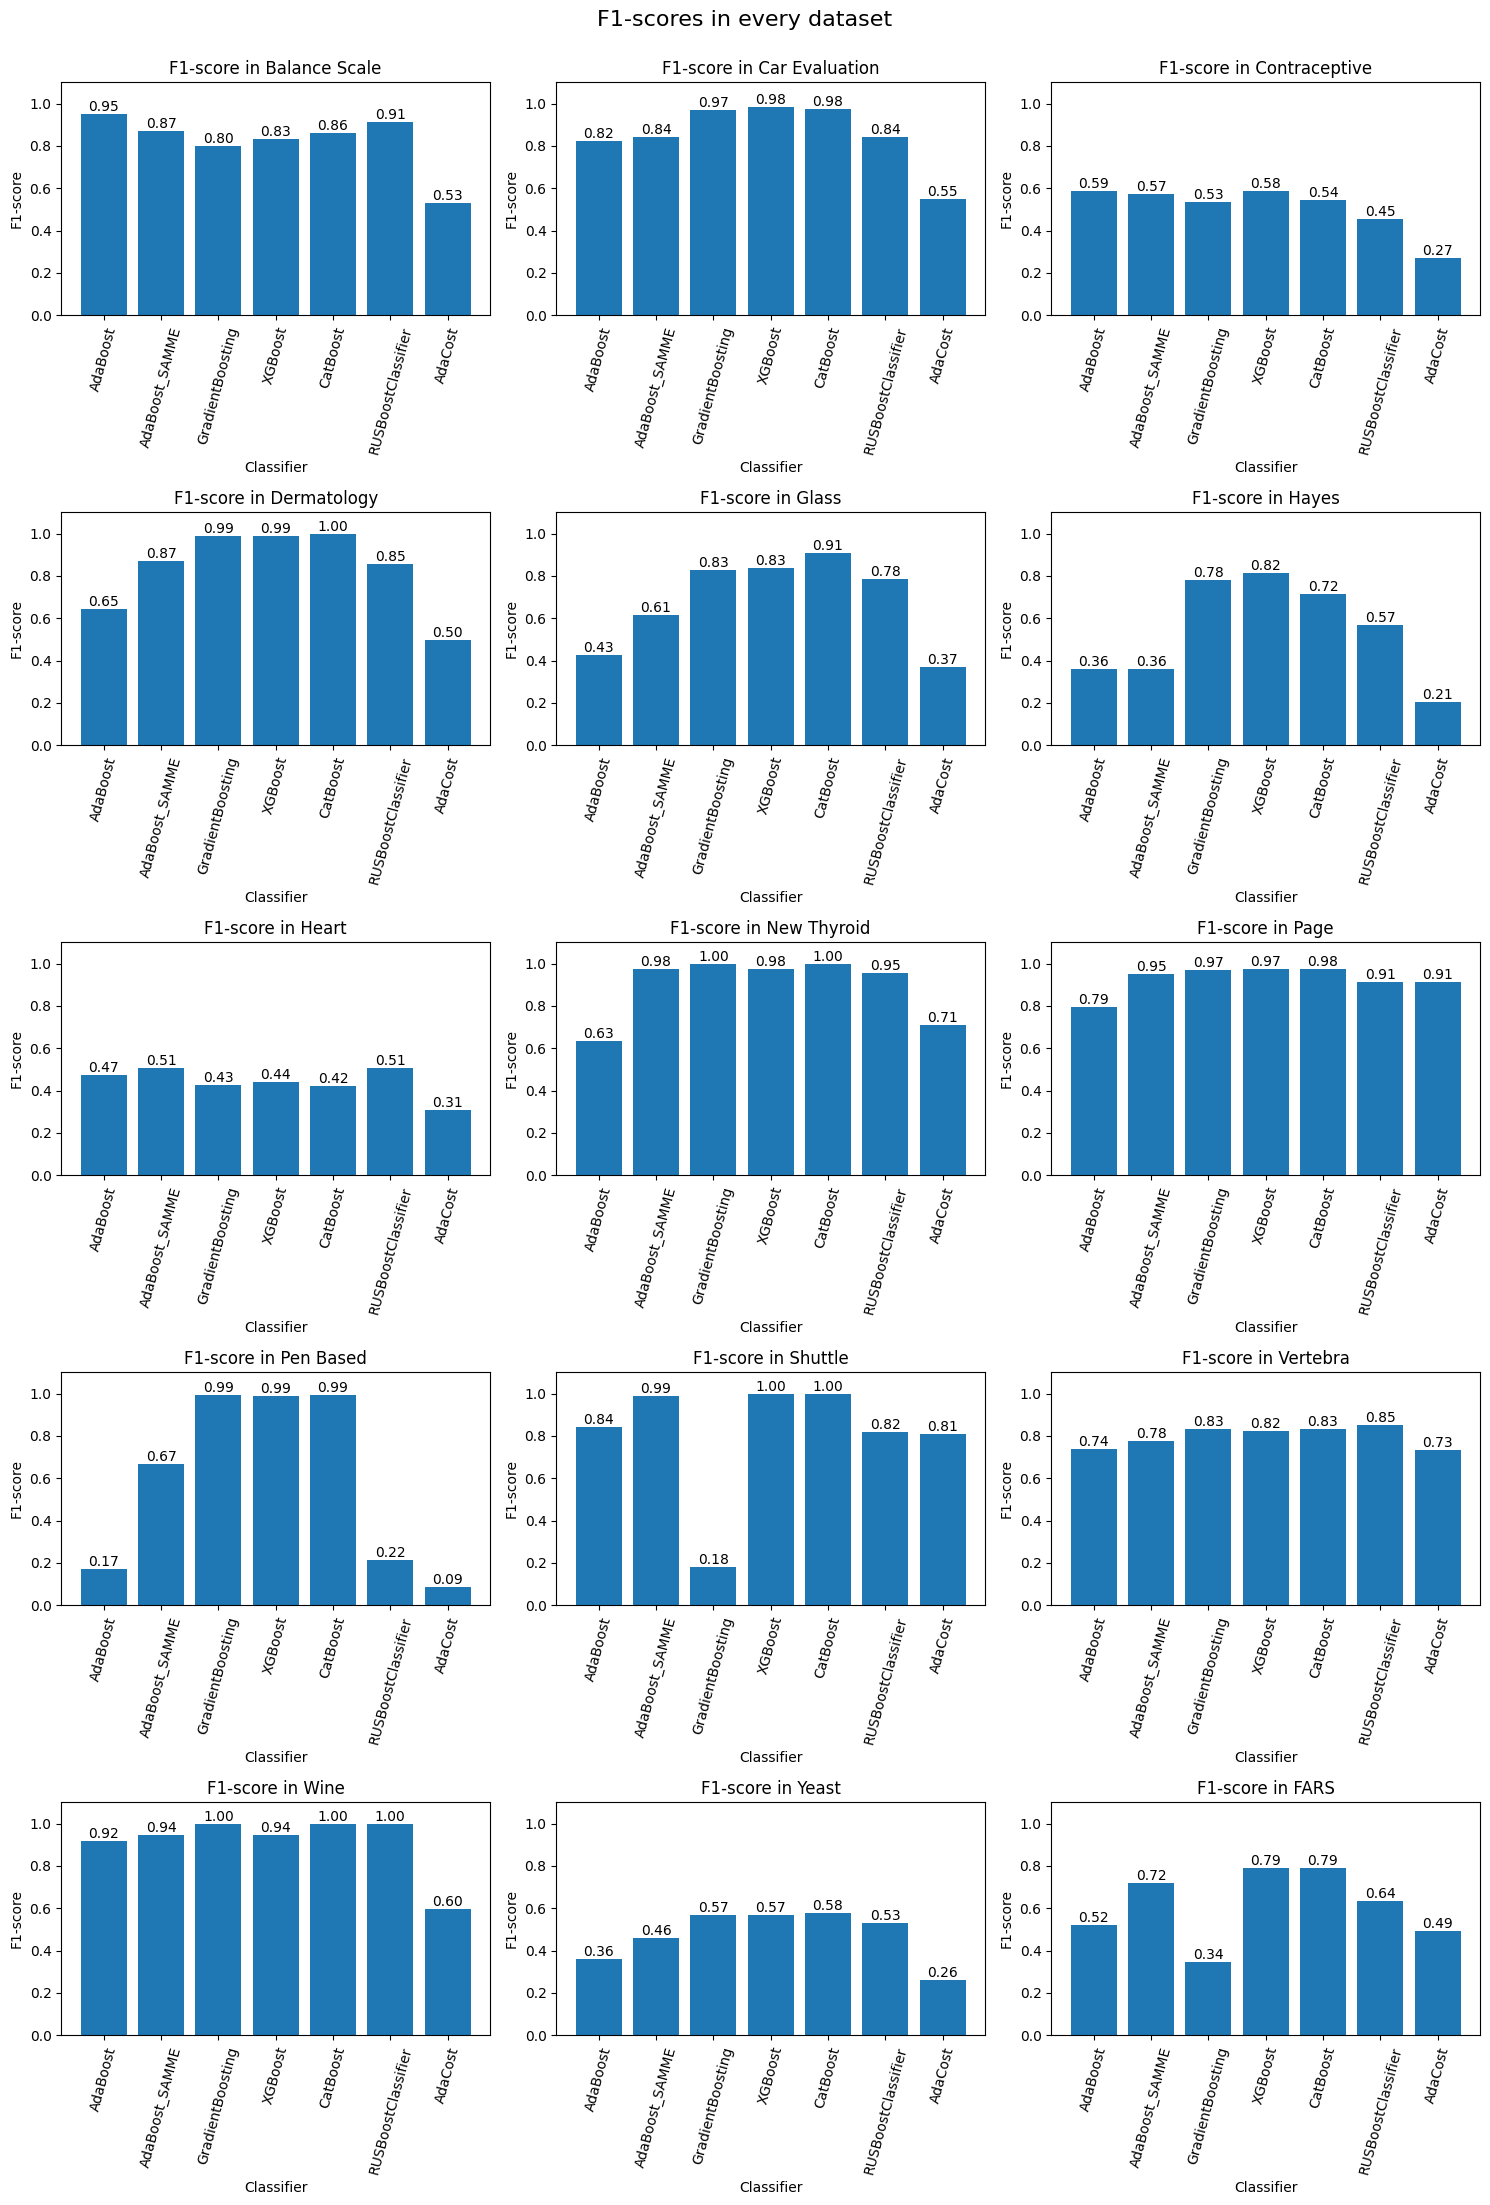

In [18]:
fig, axs = plt.subplots(5, 3, figsize=(15, 22))
for i, (dataset, scores) in enumerate(initial_model_results_datasetbase.items()):
    row = i // 3
    col = i % 3
    clf_names = ['AdaBoost','AdaBoost_SAMME','GradientBoosting','XGBoost','CatBoost','RUSBoostClassifier','AdaCost']
    clf_score = scores
    
    bars = axs[row, col].bar(clf_names, clf_score)
    for bar, value in zip(bars, clf_score):
        axs[row, col].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.2f}'.format(value),
                           ha='center', va='bottom', color='black', fontsize=10)
    axs[row, col].set_xlabel('Classifier')
    axs[row, col].set_ylabel('F1-score')
    axs[row, col].set_title(f'F1-score in {dataset}')
    axs[row, col].set_ylim(0, 1.1)  
    for tick in axs[row, col].get_xticklabels():
        tick.set_rotation(75)

fig.suptitle('F1-scores in every dataset', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

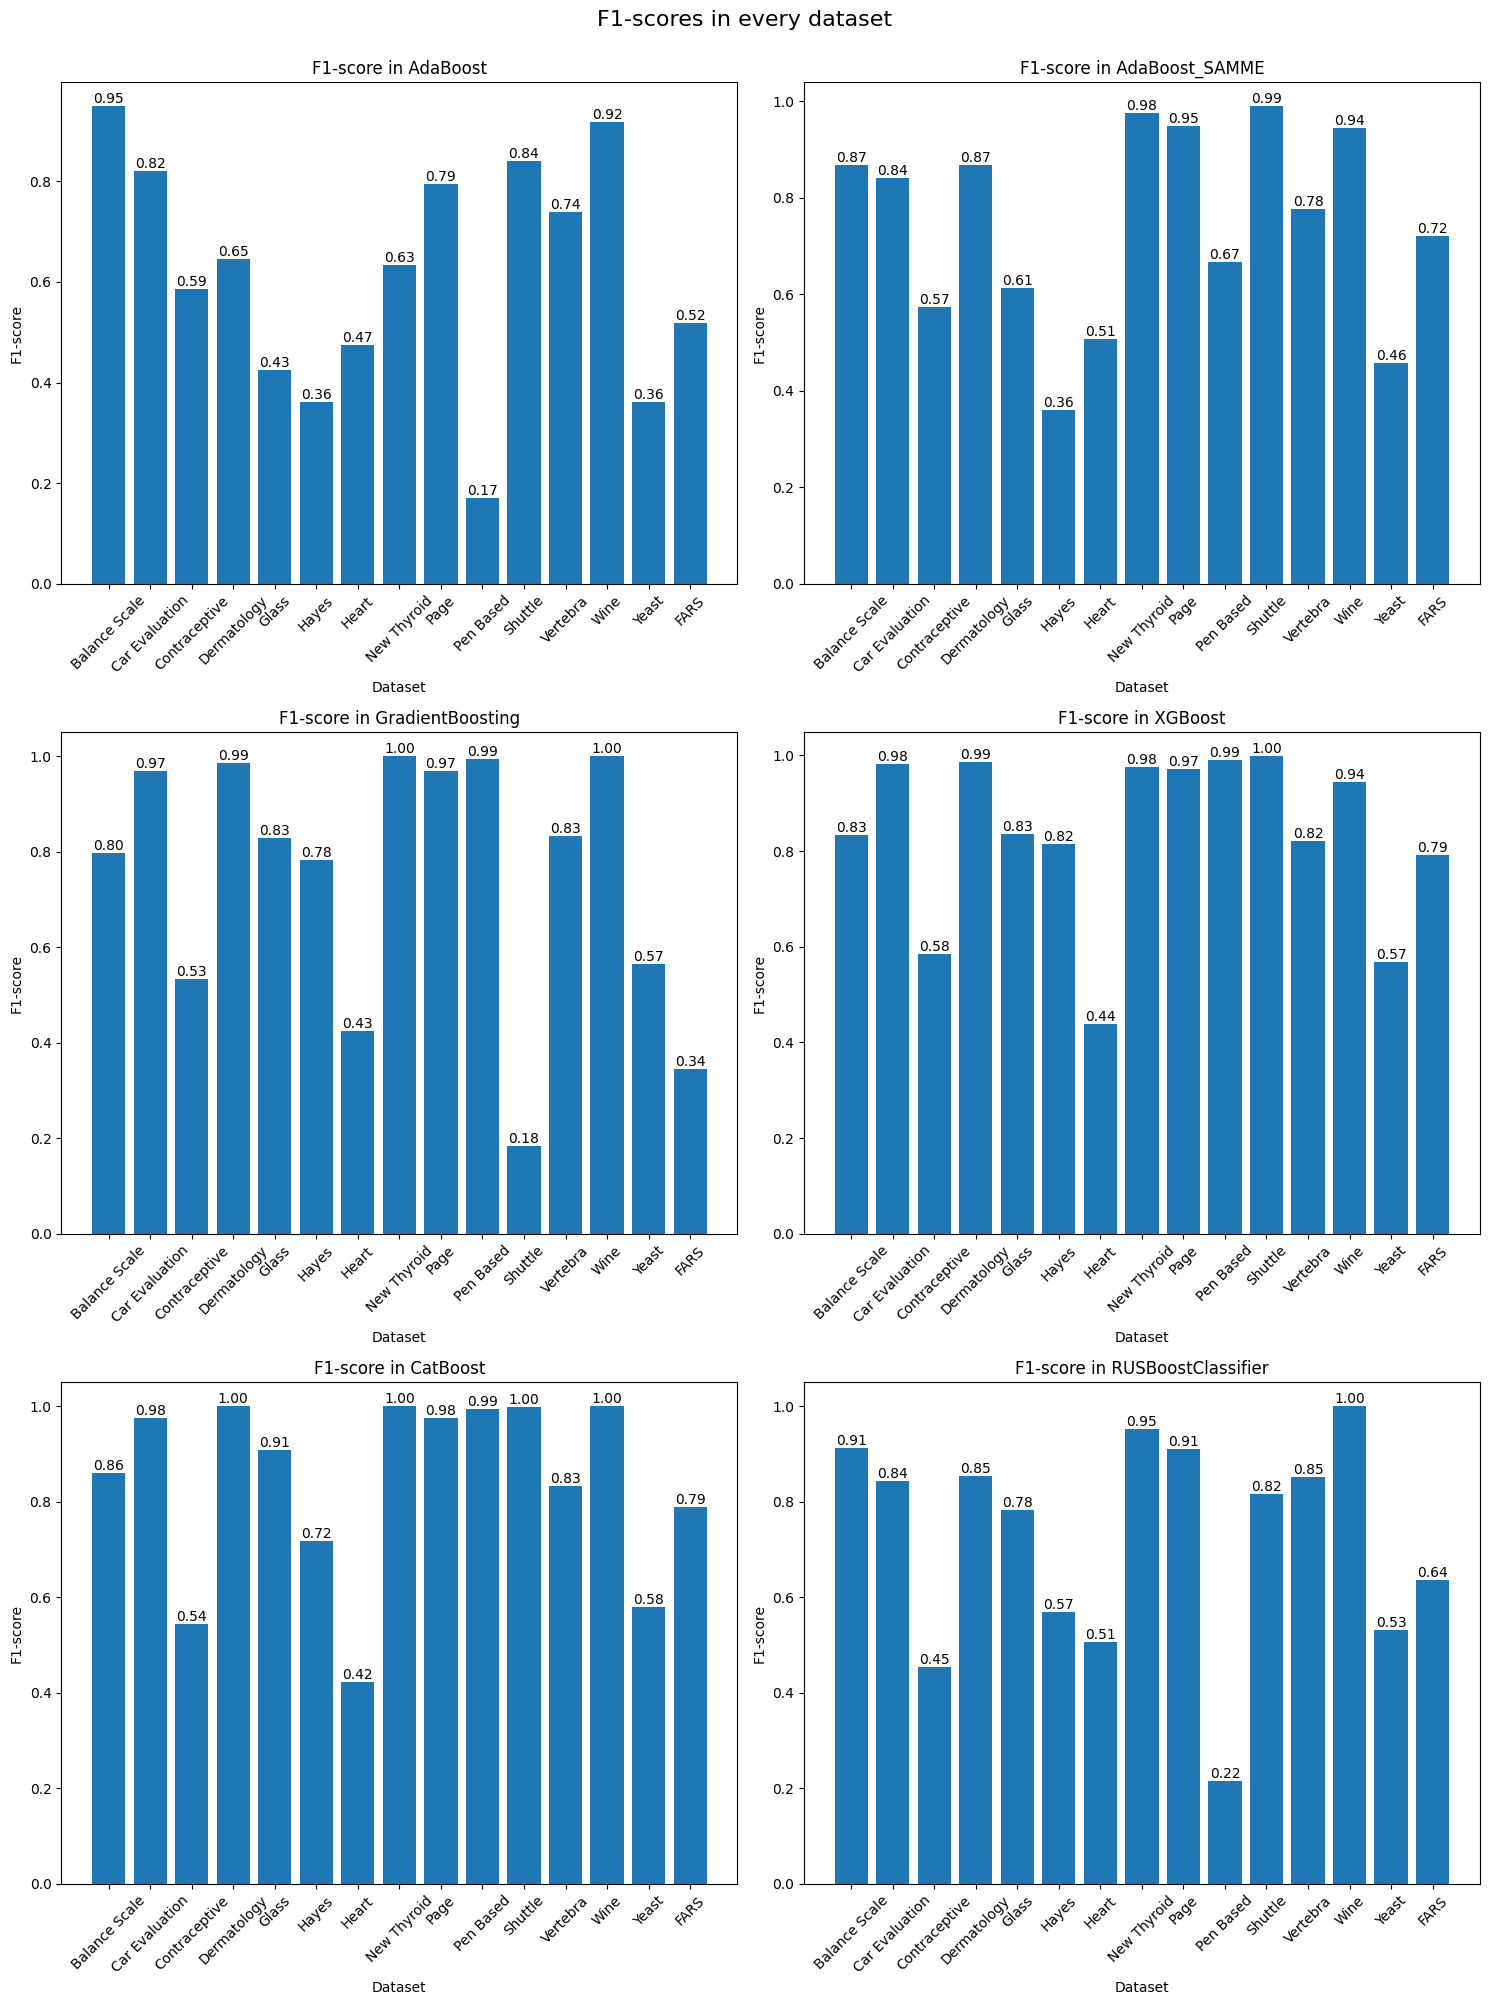

In [34]:
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
for i, (dataset, results) in enumerate(initial_model_results.items()):
    row = i // 2
    col = i % 2
    class_names = results['f1'].keys()
    class_values = results['f1'].values
    
    bars = axs[row, col].bar(class_names, class_values)
    for bar, value in zip(bars, class_values):
        axs[row, col].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.2f}'.format(value),
                           ha='center', va='bottom', color='black', fontsize=10)
    axs[row, col].set_xlabel('Dataset')
    axs[row, col].set_ylabel('F1-score')
    axs[row, col].set_title(f'F1-score in {dataset}')
    for tick in axs[row, col].get_xticklabels():
        tick.set_rotation(45)

fig.suptitle('F1-scores in every dataset', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

# Scaled

In [35]:
scaled_results = {}
for file_name in files_list:
    result = pd.read_csv(f'result/scaled/{file_name}', delimiter=',',index_col='Unnamed: 0')
    scaled_results[file_name[:-4]] = result

In [36]:
scaled_results_datasetbase = {}
name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]
for i , name in enumerate(name_list):
    scaled_results_datasetbase[name] = [result['f1'][i] for clf, result in scaled_results.items()] 


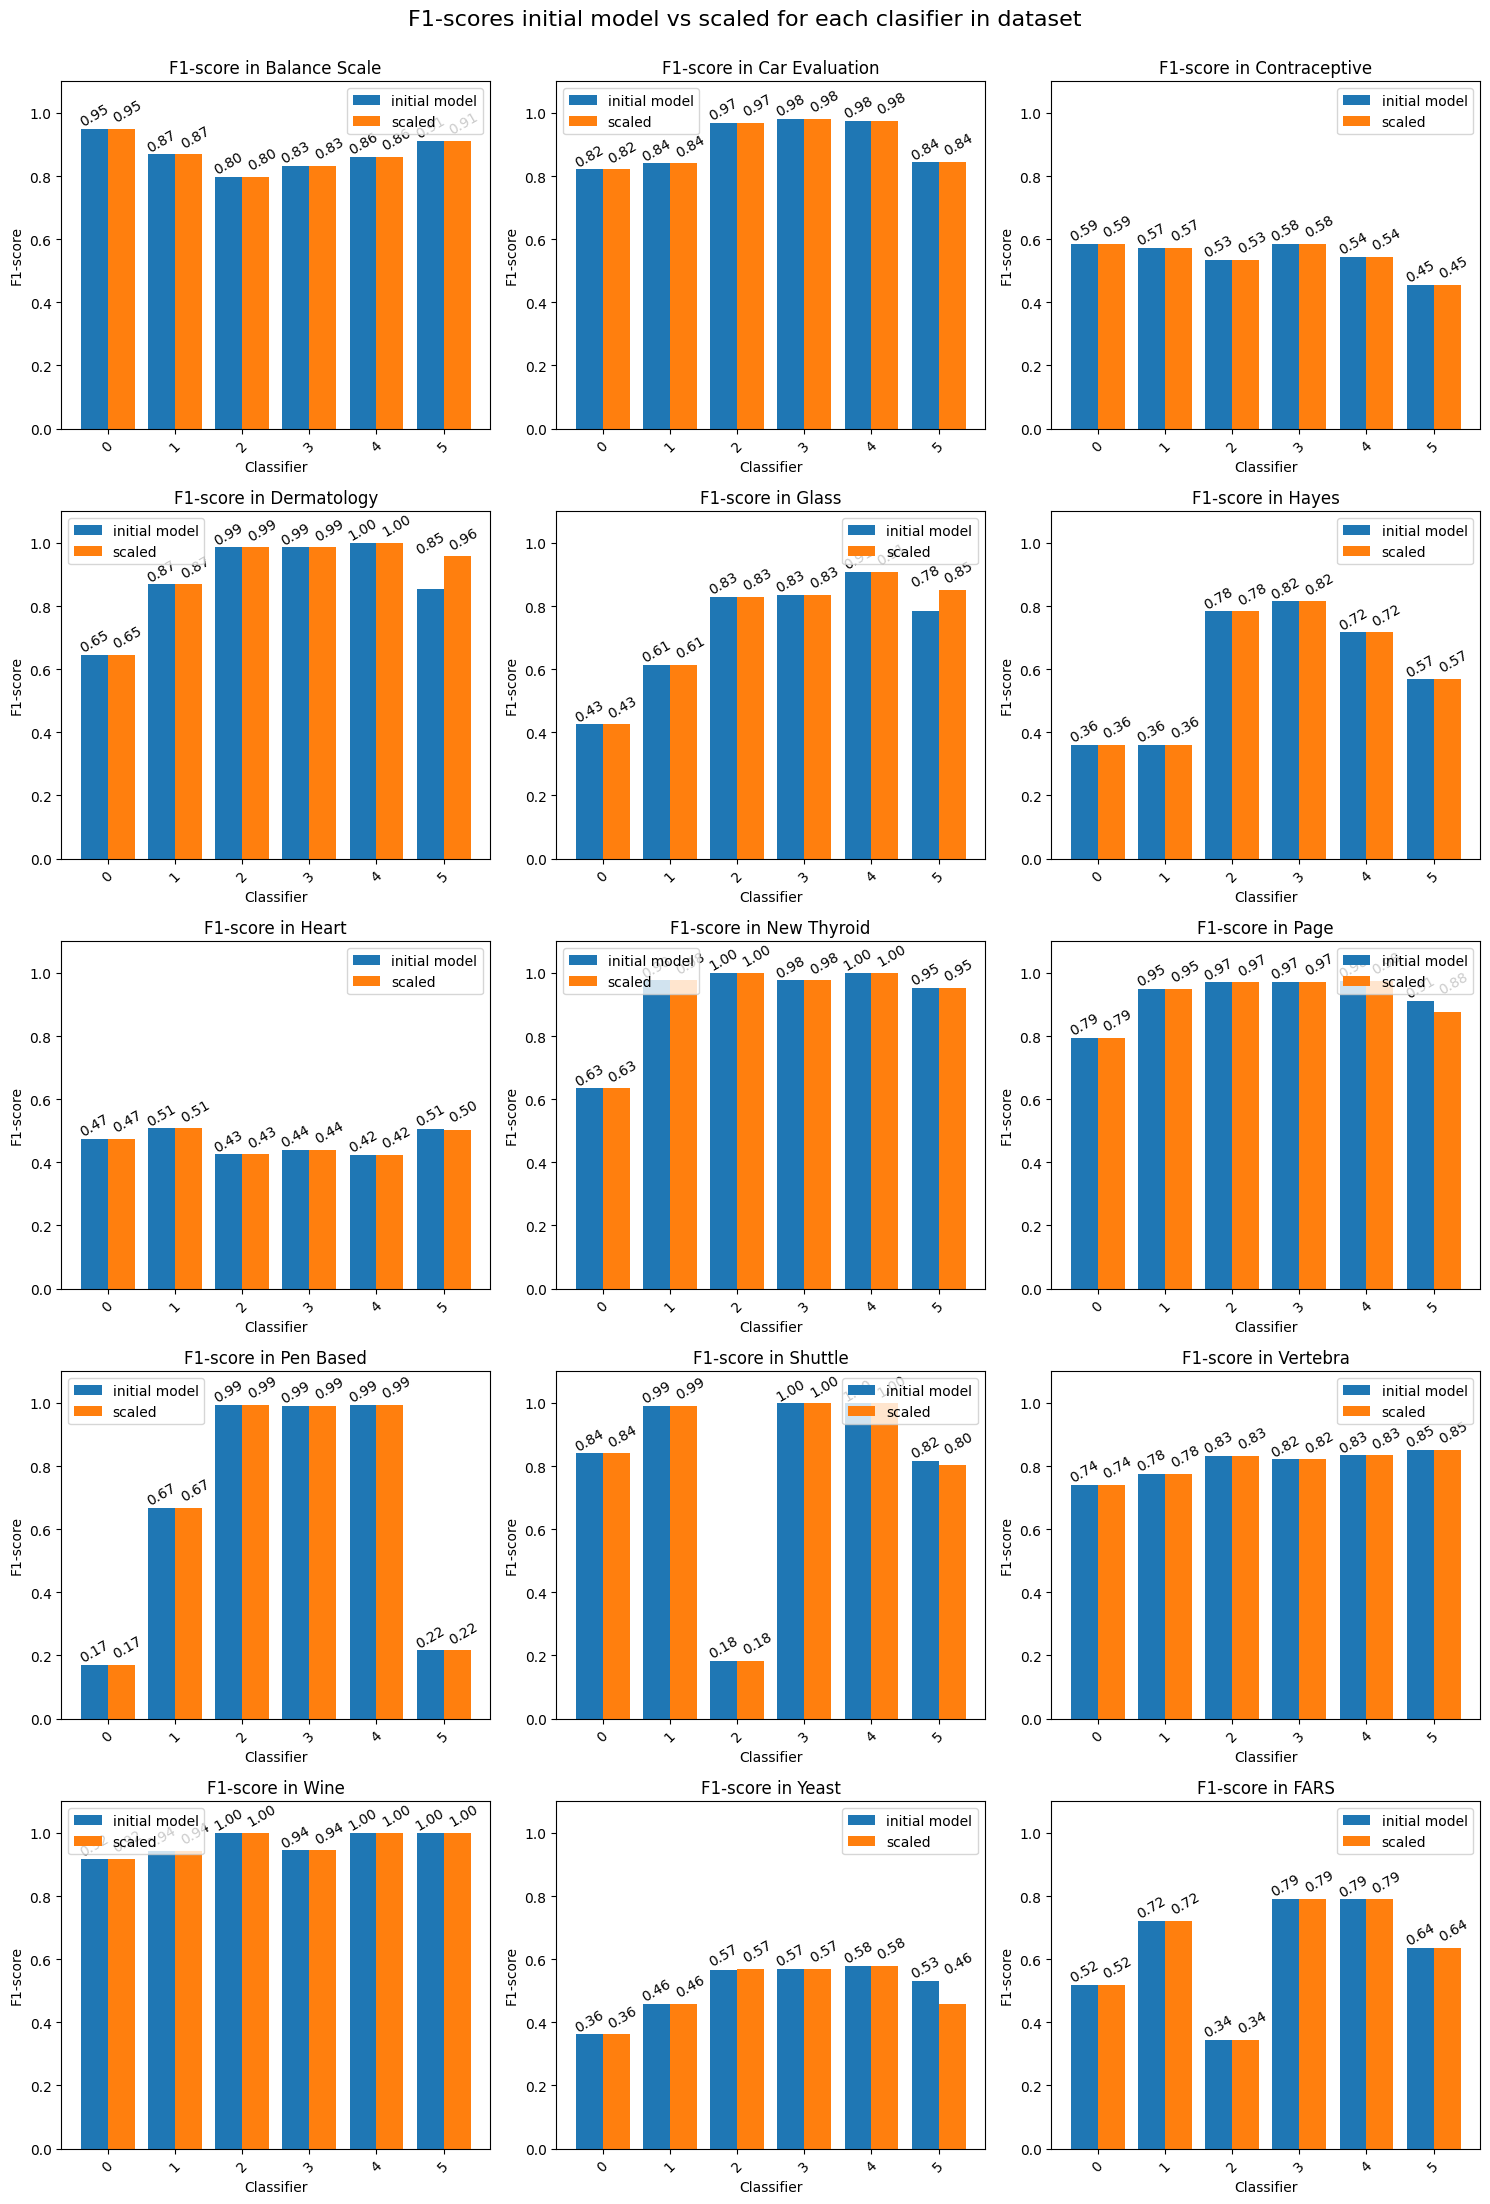

In [37]:
fig, axs = plt.subplots(5, 3, figsize=(15, 22))
for i, (dataset, scores) in enumerate(initial_model_results_datasetbase.items()):
    row = i // 3
    col = i % 3
    clf_names = ['AdaBoost','AdaBoost_SAMME','GradientBoosting','XGBoost','CatBoost','RUSBoostClassifier']
    clf_in_score = scores

    clf_re_score = scaled_results_datasetbase[dataset]
    
    x = np.arange(len(clf_names))  
    width = 0.4  

    rects1 = axs[row, col].bar(x - width/2, clf_in_score, width, label='initial model')
    rects2 = axs[row, col].bar(x + width/2, clf_re_score, width, label='scaled')
    
    # bars = axs[row, col].bar(clf_names, clf_score)
    # for bar, value in zip(bars, clf_score):
    #     axs[row, col].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.2f}'.format(value),
    #                        ha='center', va='bottom', color='black', fontsize=10)
    axs[row, col].set_xlabel('Classifier')
    axs[row, col].set_ylabel('F1-score')
    axs[row, col].set_title(f'F1-score in {dataset}')
    axs[row, col].set_ylim(0, 1.1)  
    axs[row, col].legend()
    for tick in axs[row, col].get_xticklabels():
        tick.set_rotation(45)

    for bar, value1, value2 in zip(rects1, clf_in_score, clf_re_score):
        height = max(value1, value2)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(value1),
                           ha='center', va='bottom', color='black', fontsize=10, rotation=30)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2 + 0.5, height + 0.1, '{:.2f}'.format(value2),
                           ha='center', va='top', color='black', fontsize=10, rotation=30)
        

fig.suptitle('F1-scores initial model vs scaled for each clasifier in dataset', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

# Resampled

**TomekLinks**

In [38]:
resampled_tl_results = {}
for file_name in files_list:
    result = pd.read_csv(f'result/resampled/TomekLinks_{file_name}', delimiter=',',index_col='Unnamed: 0')
    resampled_tl_results[f'{file_name[:-4]}'] = result

In [39]:
resampled_tl_results_datasetbase = {}
name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]
for i , name in enumerate(name_list):
    resampled_tl_results_datasetbase[name] = [result['f1'][i] for clf, result in resampled_tl_results.items()] 


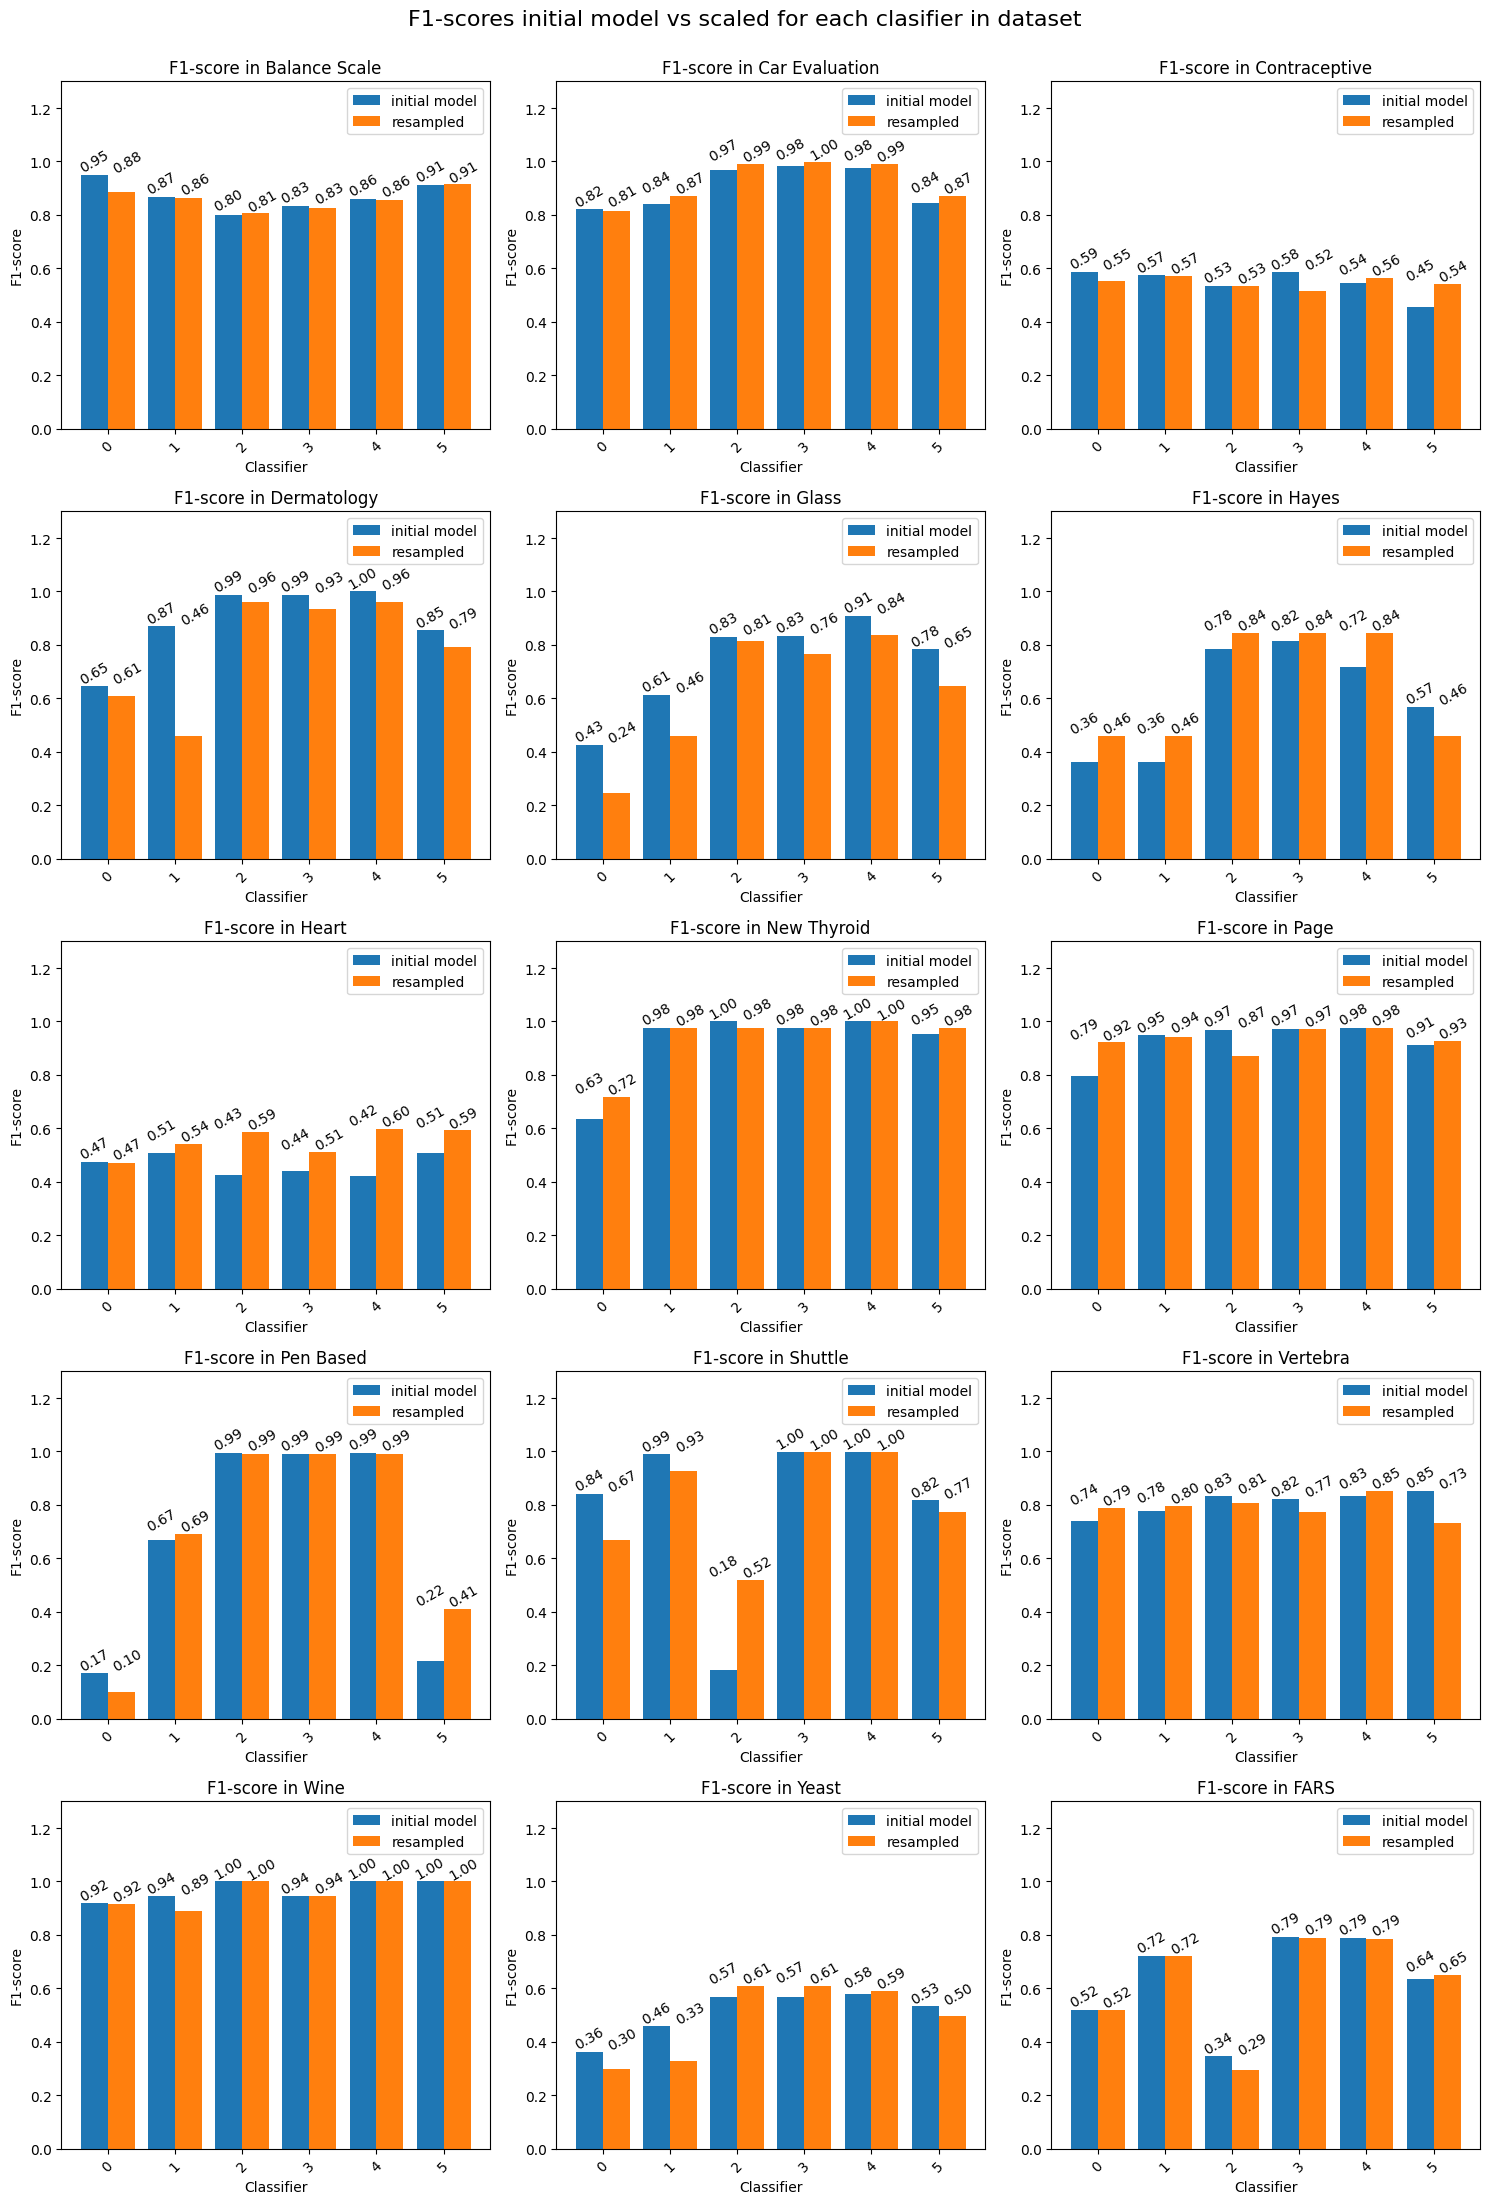

In [40]:
fig, axs = plt.subplots(5, 3, figsize=(15, 22))
for i, (dataset, scores) in enumerate(initial_model_results_datasetbase.items()):
    row = i // 3
    col = i % 3
    clf_names = ['AdaBoost','AdaBoost_SAMME','GradientBoosting','XGBoost','CatBoost','RUSBoostClassifier']
    clf_in_score = scores

    clf_re_score = resampled_tl_results_datasetbase[dataset]
    
    x = np.arange(len(clf_names))  
    width = 0.4  

    rects1 = axs[row, col].bar(x - width/2, clf_in_score, width, label='initial model')
    rects2 = axs[row, col].bar(x + width/2, clf_re_score, width, label='resampled')
    
    # bars = axs[row, col].bar(clf_names, clf_score)
    # for bar, value in zip(bars, clf_score):
    #     axs[row, col].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.2f}'.format(value),
    #                        ha='center', va='bottom', color='black', fontsize=10)
    axs[row, col].set_xlabel('Classifier')
    axs[row, col].set_ylabel('F1-score')
    axs[row, col].set_title(f'F1-score in {dataset}')
    axs[row, col].set_ylim(0, 1.3)  
    axs[row, col].legend()
    for tick in axs[row, col].get_xticklabels():
        tick.set_rotation(45)

    for bar, value1, value2 in zip(rects1, clf_in_score, clf_re_score):
        height = max(value1, value2)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(value1),
                           ha='center', va='bottom', color='black', fontsize=10, rotation=30)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2 + 0.5, height + 0.1, '{:.2f}'.format(value2),
                           ha='center', va='top', color='black', fontsize=10, rotation=30)

        

fig.suptitle('F1-scores initial model vs scaled for each clasifier in dataset', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

RandomUnderSampler

In [41]:
resampled_rus_results = {}
for file_name in files_list:
    result = pd.read_csv(f'result/resampled/RandomUnderSampler_{file_name}', delimiter=',',index_col='Unnamed: 0')
    resampled_rus_results[f'{file_name[:-4]}'] = result

In [42]:
resampled_rus_results_datasetbase = {}
name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]
for i , name in enumerate(name_list):
    resampled_rus_results_datasetbase[name] = [result['f1'][i] for clf, result in resampled_rus_results.items()] 

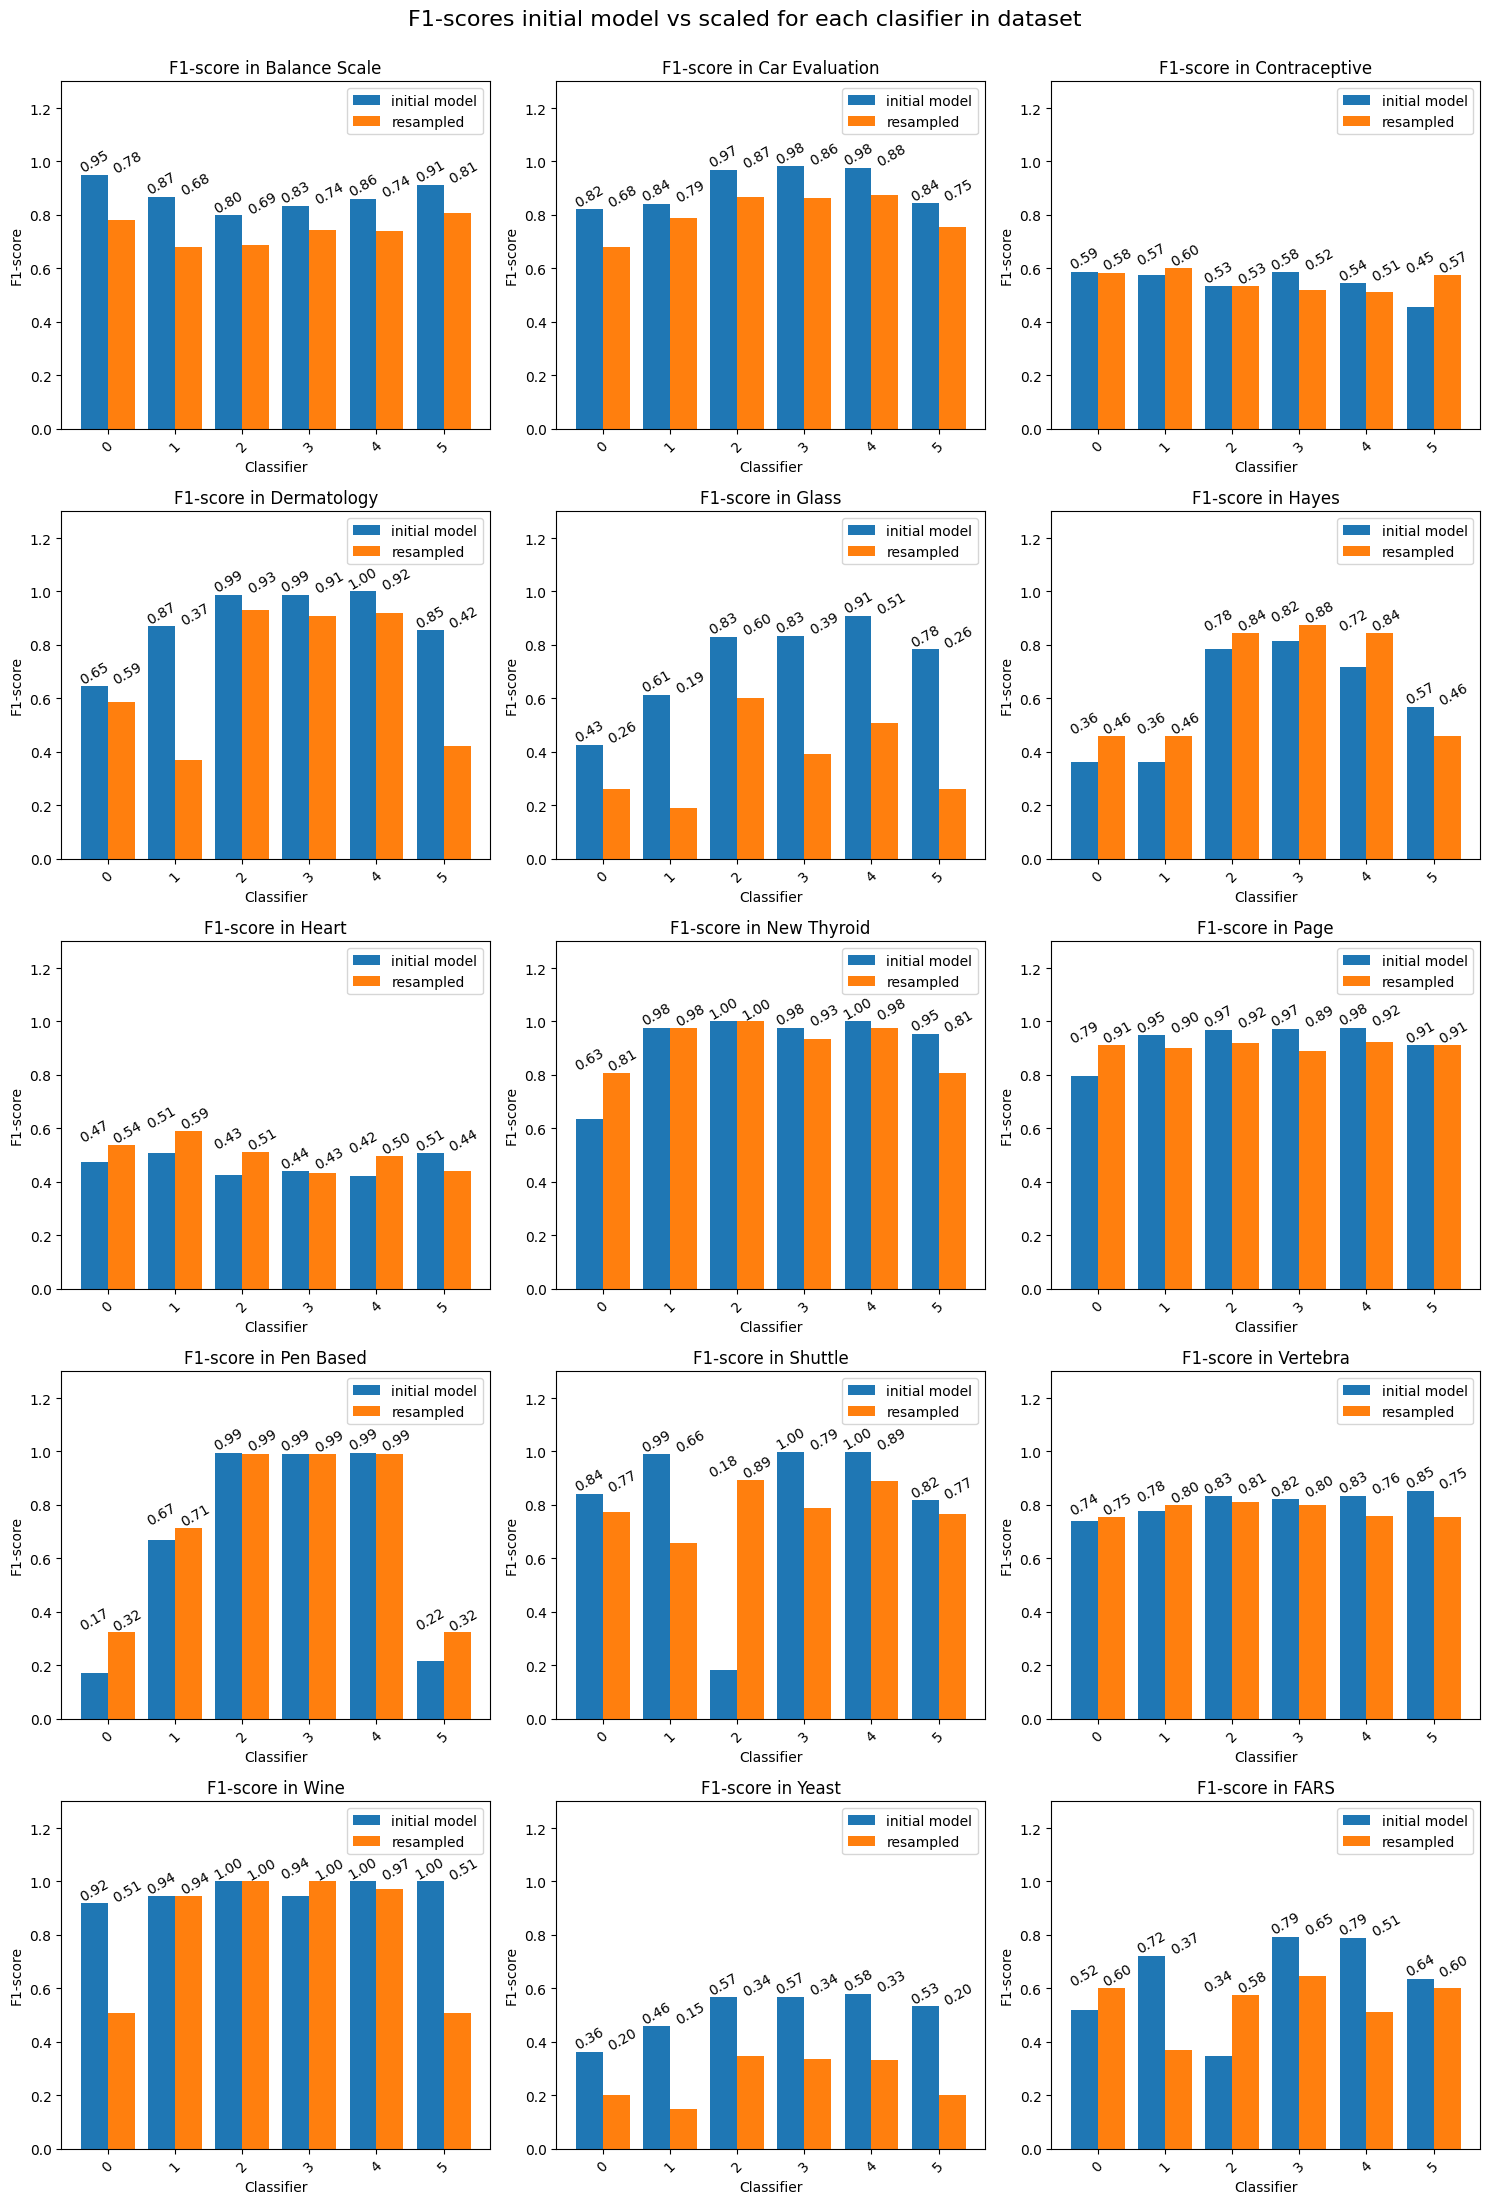

In [46]:
fig, axs = plt.subplots(5, 3, figsize=(15, 22))
for i, (dataset, scores) in enumerate(initial_model_results_datasetbase.items()):
    row = i // 3
    col = i % 3
    clf_names = ['AdaBoost','AdaBoost_SAMME','GradientBoosting','XGBoost','CatBoost','RUSBoostClassifier']
    clf_in_score = scores

    clf_re_score = resampled_rus_results_datasetbase[dataset]
    
    x = np.arange(len(clf_names))  
    width = 0.4  

    rects1 = axs[row, col].bar(x - width/2, clf_in_score, width, label='initial model')
    rects2 = axs[row, col].bar(x + width/2, clf_re_score, width, label='resampled')
    
    axs[row, col].set_xlabel('Classifier')
    axs[row, col].set_ylabel('F1-score')
    axs[row, col].set_title(f'F1-score in {dataset}')
    axs[row, col].set_ylim(0, 1.3)  
    axs[row, col].legend()
    for tick in axs[row, col].get_xticklabels():
        tick.set_rotation(45)

    for bar, value1, value2 in zip(rects1, clf_in_score, clf_re_score):
        height = max(value1, value2)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(value1),
                           ha='center', va='bottom', color='black', fontsize=10, rotation=30)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2 + 0.5, height + 0.1, '{:.2f}'.format(value2),
                           ha='center', va='top', color='black', fontsize=10, rotation=30)

        

fig.suptitle('F1-scores initial model vs scaled for each clasifier in dataset', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

**ClusterCentroids**

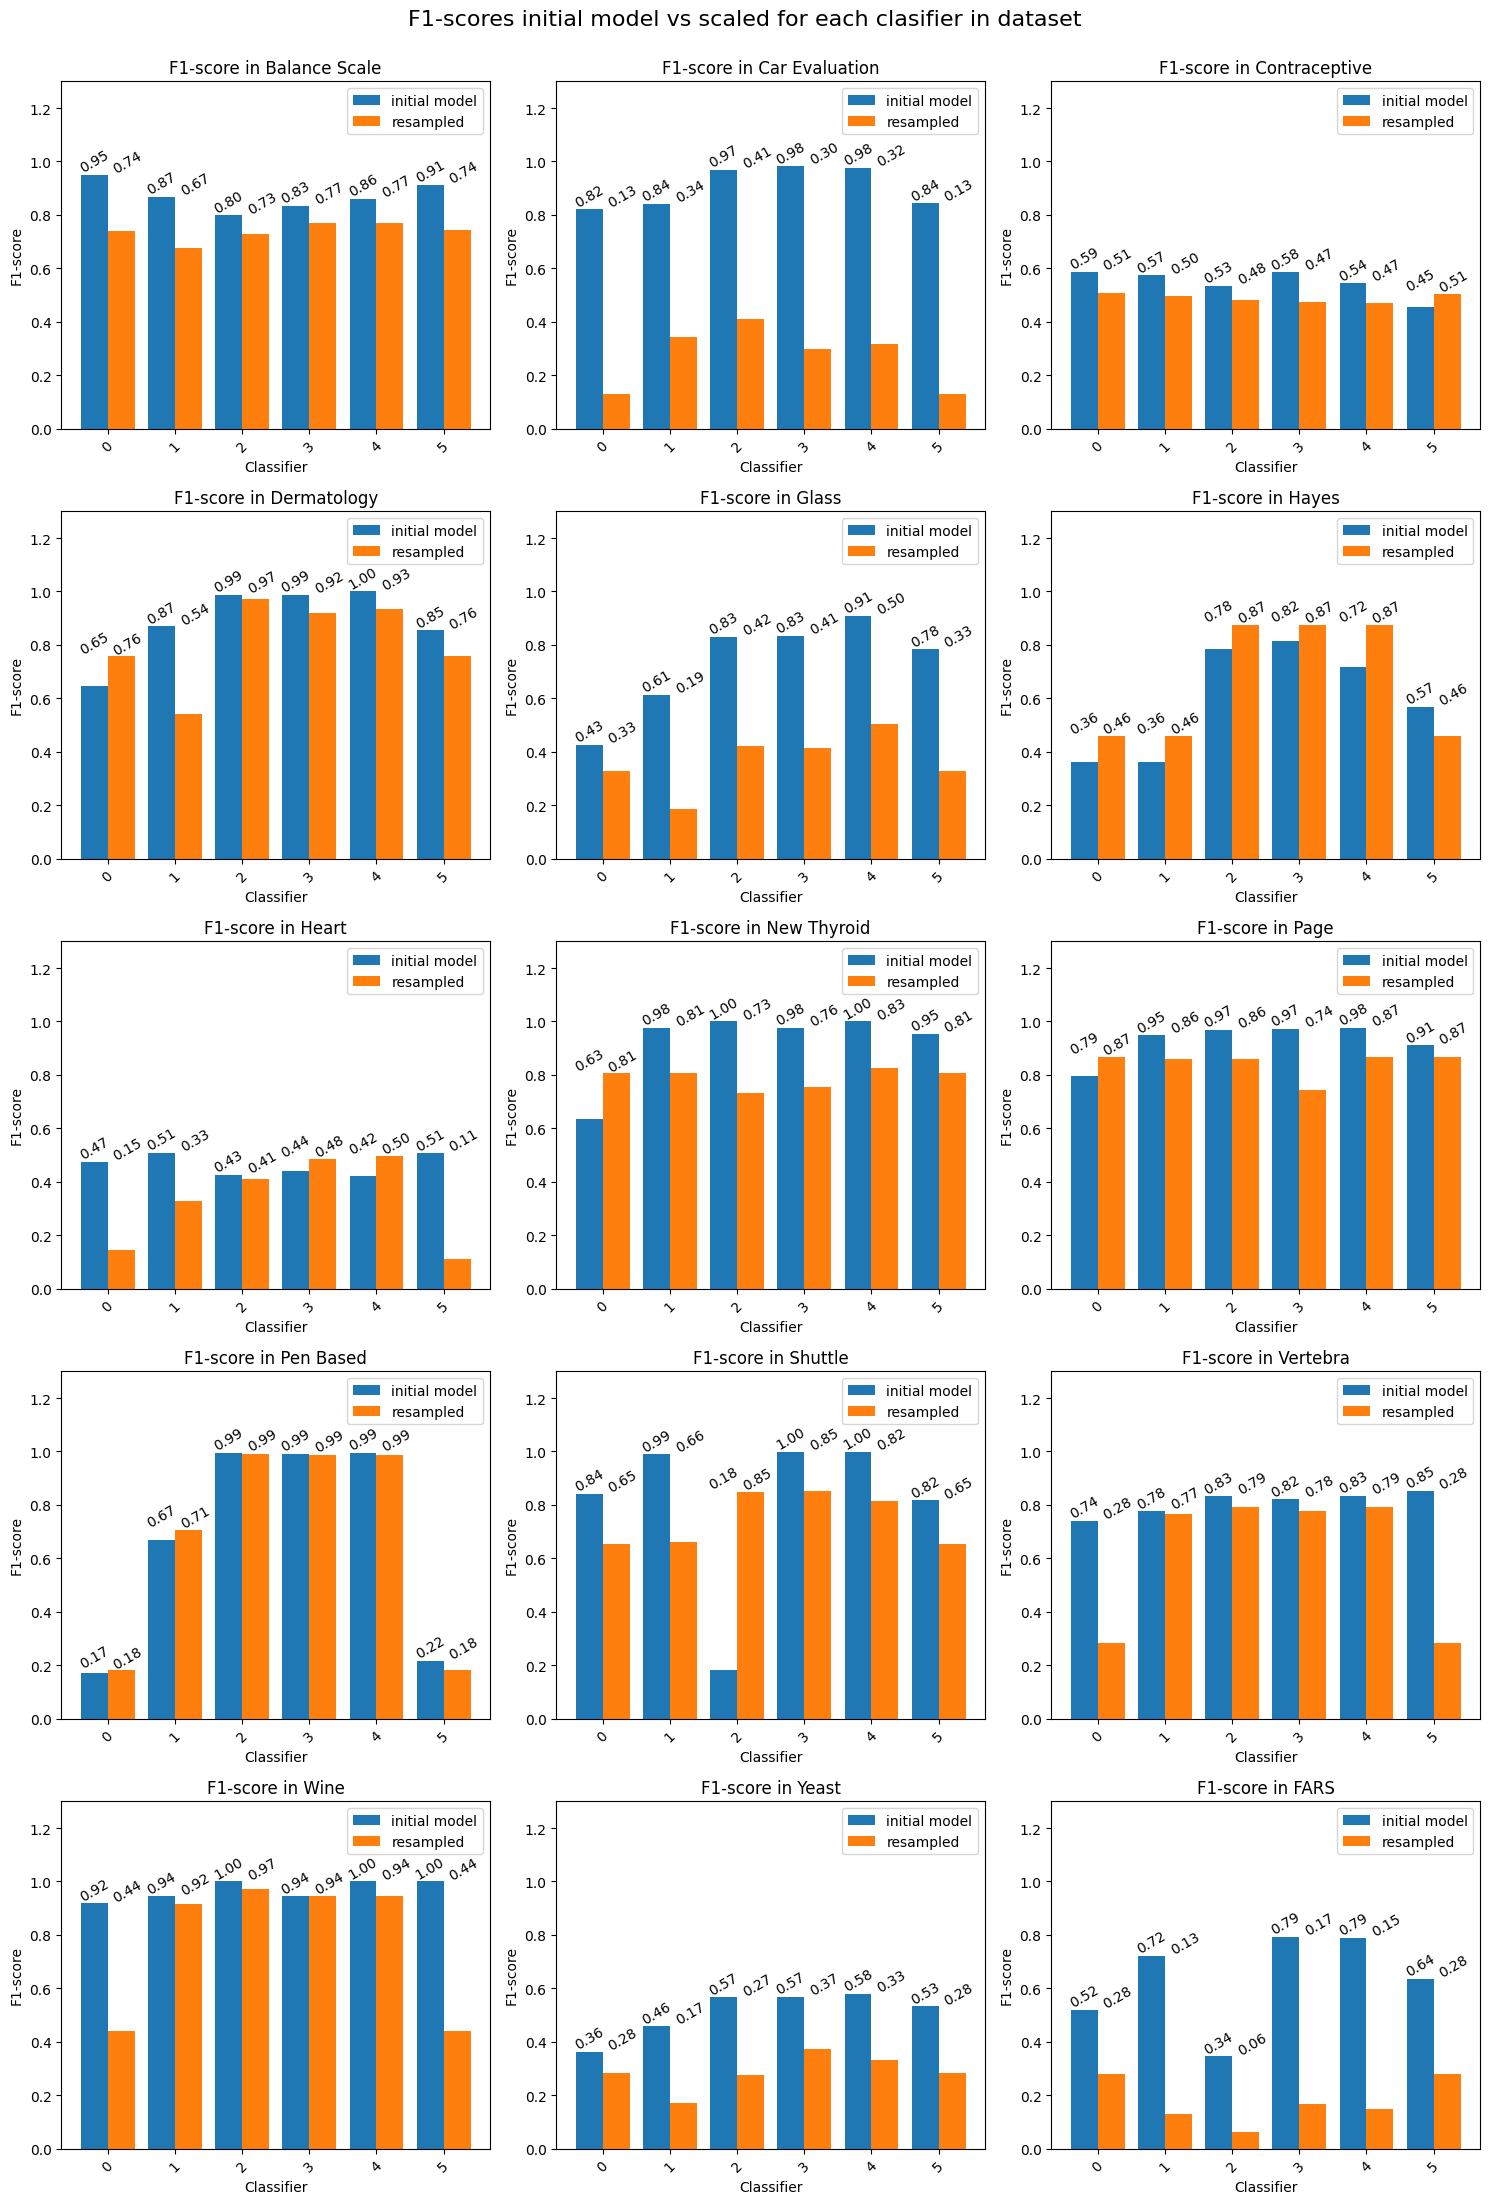

In [47]:
resampled_cc_results = {}
for file_name in files_list:
    result = pd.read_csv(f'result/resampled/ClusterCentroids_{file_name}', delimiter=',',index_col='Unnamed: 0')
    resampled_cc_results[f'{file_name[:-4]}'] = result
    
resampled_cc_results_datasetbase = {}
name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]
for i , name in enumerate(name_list):
    resampled_cc_results_datasetbase[name] = [result['f1'][i] for clf, result in resampled_cc_results.items()] 

fig, axs = plt.subplots(5, 3, figsize=(15, 22))
for i, (dataset, scores) in enumerate(initial_model_results_datasetbase.items()):
    row = i // 3
    col = i % 3
    clf_names = ['AdaBoost','AdaBoost_SAMME','GradientBoosting','XGBoost','CatBoost','RUSBoostClassifier']
    clf_in_score = scores

    clf_re_score = resampled_cc_results_datasetbase[dataset]
    
    x = np.arange(len(clf_names))  
    width = 0.4  

    rects1 = axs[row, col].bar(x - width/2, clf_in_score, width, label='initial model')
    rects2 = axs[row, col].bar(x + width/2, clf_re_score, width, label='resampled')
    
    axs[row, col].set_xlabel('Classifier')
    axs[row, col].set_ylabel('F1-score')
    axs[row, col].set_title(f'F1-score in {dataset}')
    axs[row, col].set_ylim(0, 1.3)  
    axs[row, col].legend()
    for tick in axs[row, col].get_xticklabels():
        tick.set_rotation(45)

    for bar, value1, value2 in zip(rects1, clf_in_score, clf_re_score):
        height = max(value1, value2)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(value1),
                           ha='center', va='bottom', color='black', fontsize=10, rotation=30)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2 + 0.5, height + 0.1, '{:.2f}'.format(value2),
                           ha='center', va='top', color='black', fontsize=10, rotation=30)

        

fig.suptitle('F1-scores initial model vs scaled for each clasifier in dataset', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

**InstanceHardnessThreshold**

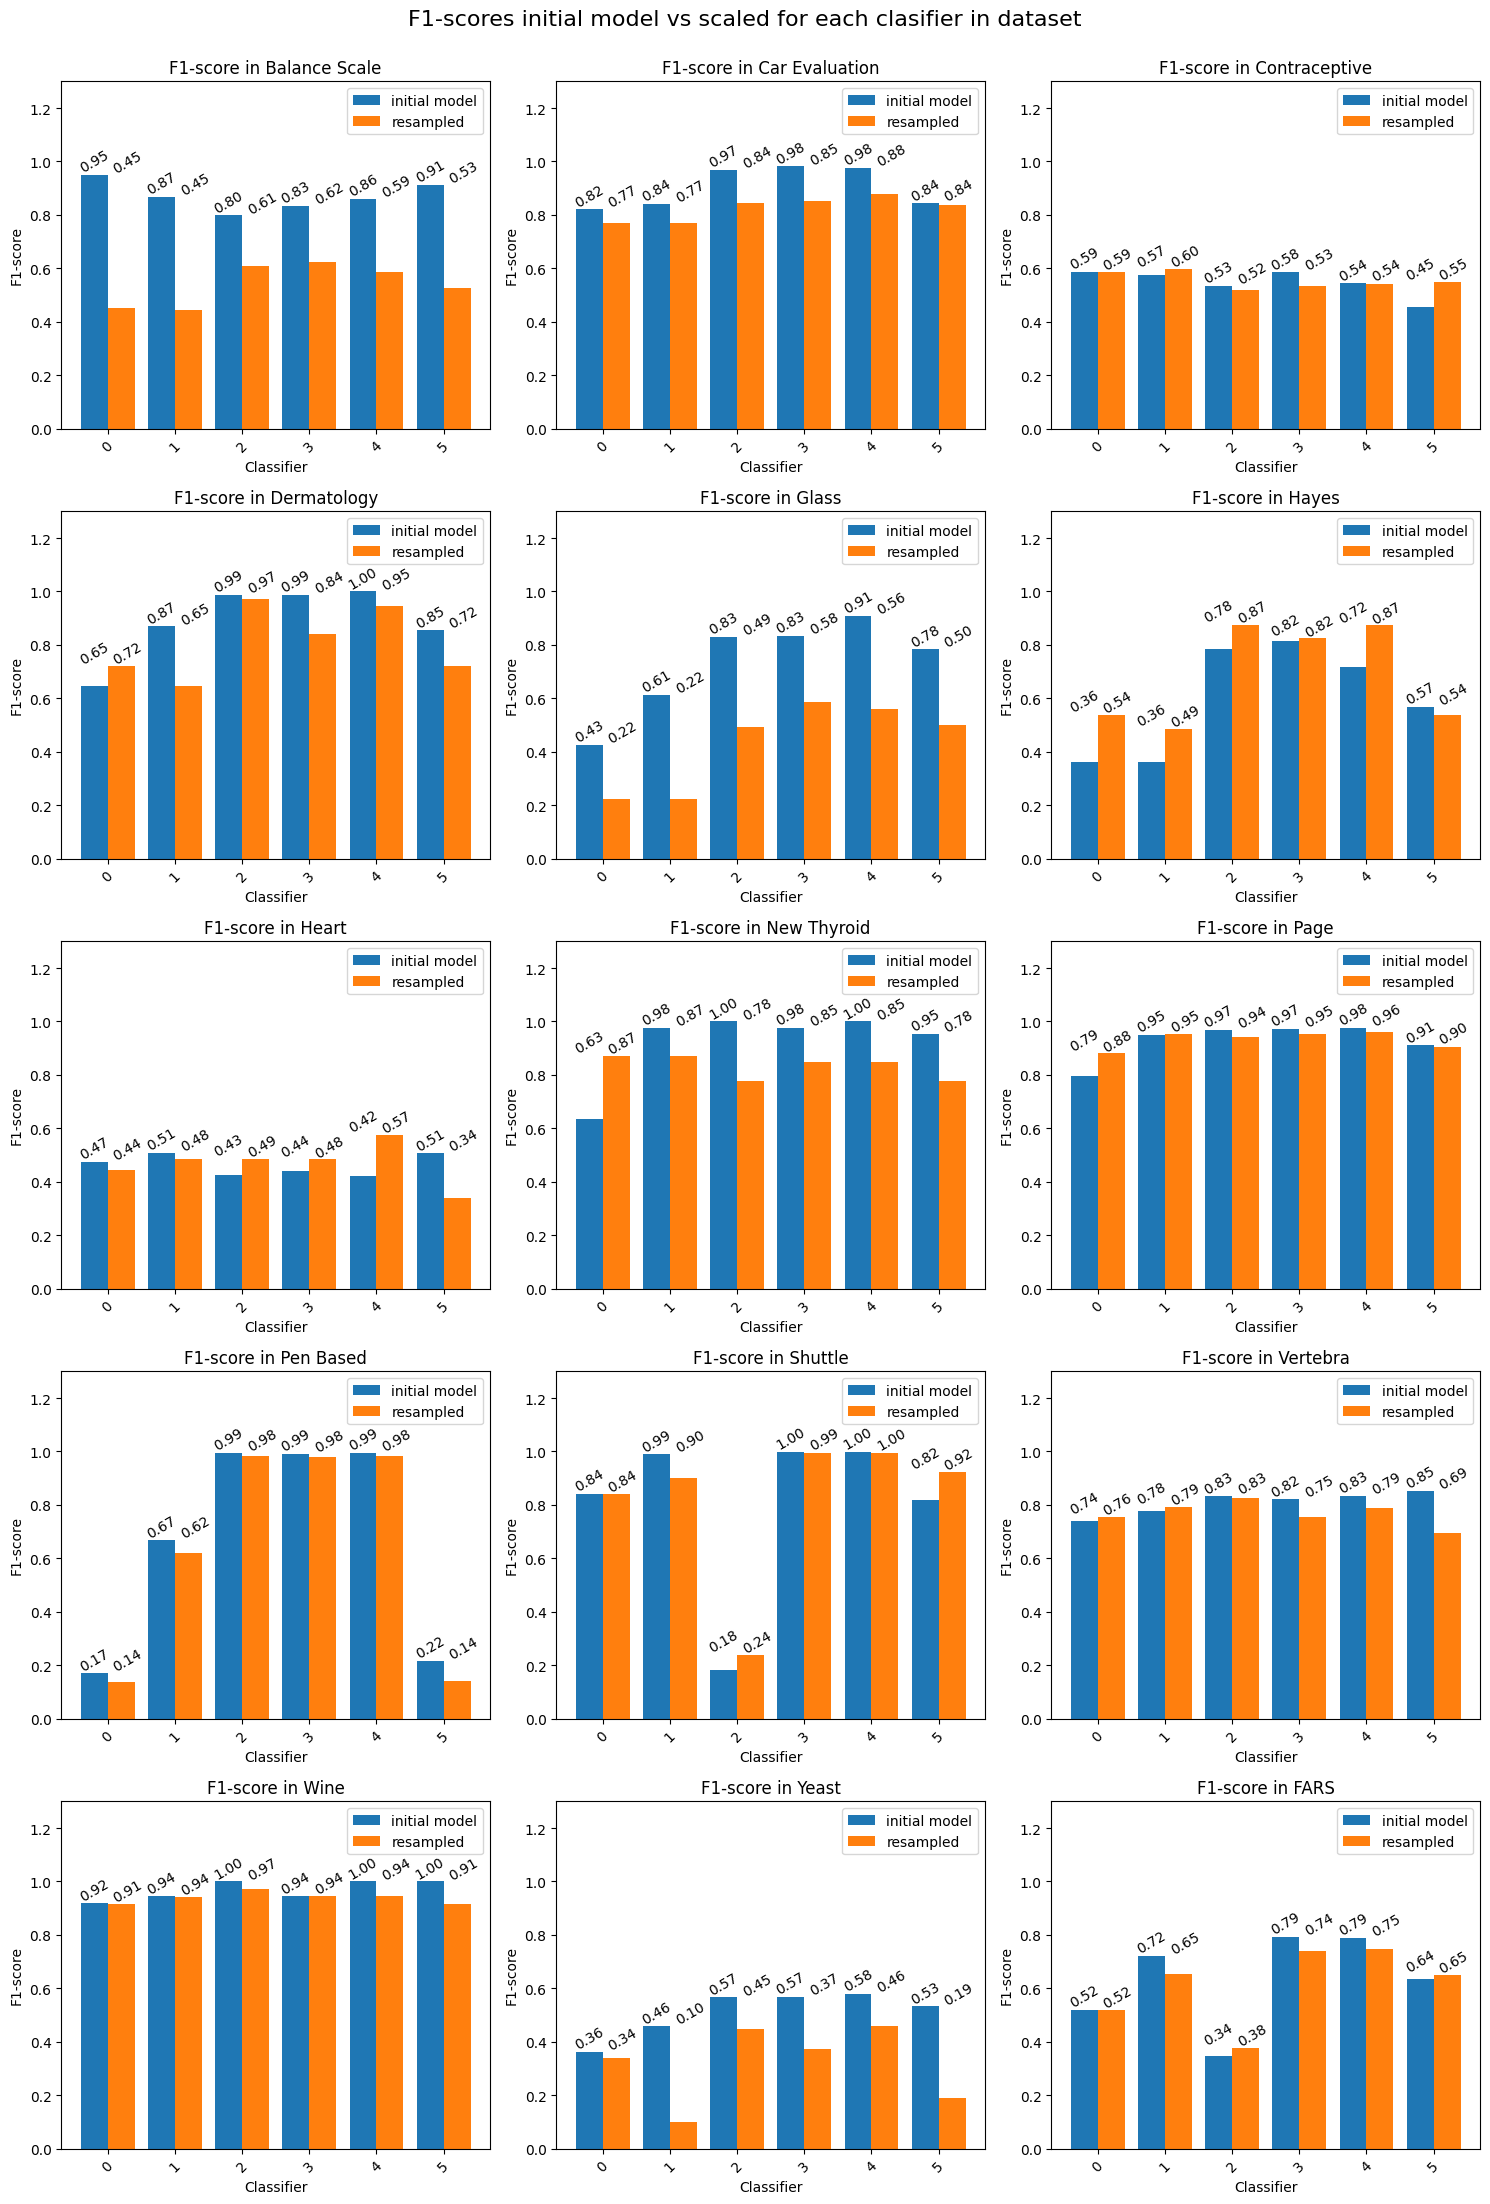

In [19]:
resampled_iht_results = {}
for file_name in files_list:
    result = pd.read_csv(f'result/resampled/InstanceHardnessThreshold_{file_name}', delimiter=',',index_col='Unnamed: 0')
    resampled_iht_results[f'{file_name[:-4]}'] = result
    
resampled_iht_results_datasetbase = {}
name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]
for i , name in enumerate(name_list):
    resampled_iht_results_datasetbase[name] = [result['f1'][i] for clf, result in resampled_iht_results.items()] 

fig, axs = plt.subplots(5, 3, figsize=(15, 22))
for i, (dataset, scores) in enumerate(initial_model_results_datasetbase.items()):
    row = i // 3
    col = i % 3
    clf_names = ['AdaBoost','AdaBoost_SAMME','GradientBoosting','XGBoost','CatBoost','RUSBoostClassifier']
    clf_in_score = scores

    clf_re_score = resampled_iht_results_datasetbase[dataset]
    
    x = np.arange(len(clf_names))  
    width = 0.4  

    rects1 = axs[row, col].bar(x - width/2, clf_in_score, width, label='initial model')
    rects2 = axs[row, col].bar(x + width/2, clf_re_score, width, label='resampled')
    
    axs[row, col].set_xlabel('Classifier')
    axs[row, col].set_ylabel('F1-score')
    axs[row, col].set_title(f'F1-score in {dataset}')
    axs[row, col].set_ylim(0, 1.3)  
    axs[row, col].legend()
    for tick in axs[row, col].get_xticklabels():
        tick.set_rotation(45)

    for bar, value1, value2 in zip(rects1, clf_in_score, clf_re_score):
        height = max(value1, value2)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(value1),
                           ha='center', va='bottom', color='black', fontsize=10, rotation=30)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2 + 0.5, height + 0.1, '{:.2f}'.format(value2),
                           ha='center', va='top', color='black', fontsize=10, rotation=30)

        

fig.suptitle('F1-scores initial model vs scaled for each clasifier in dataset', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

**RandomOverSampler**

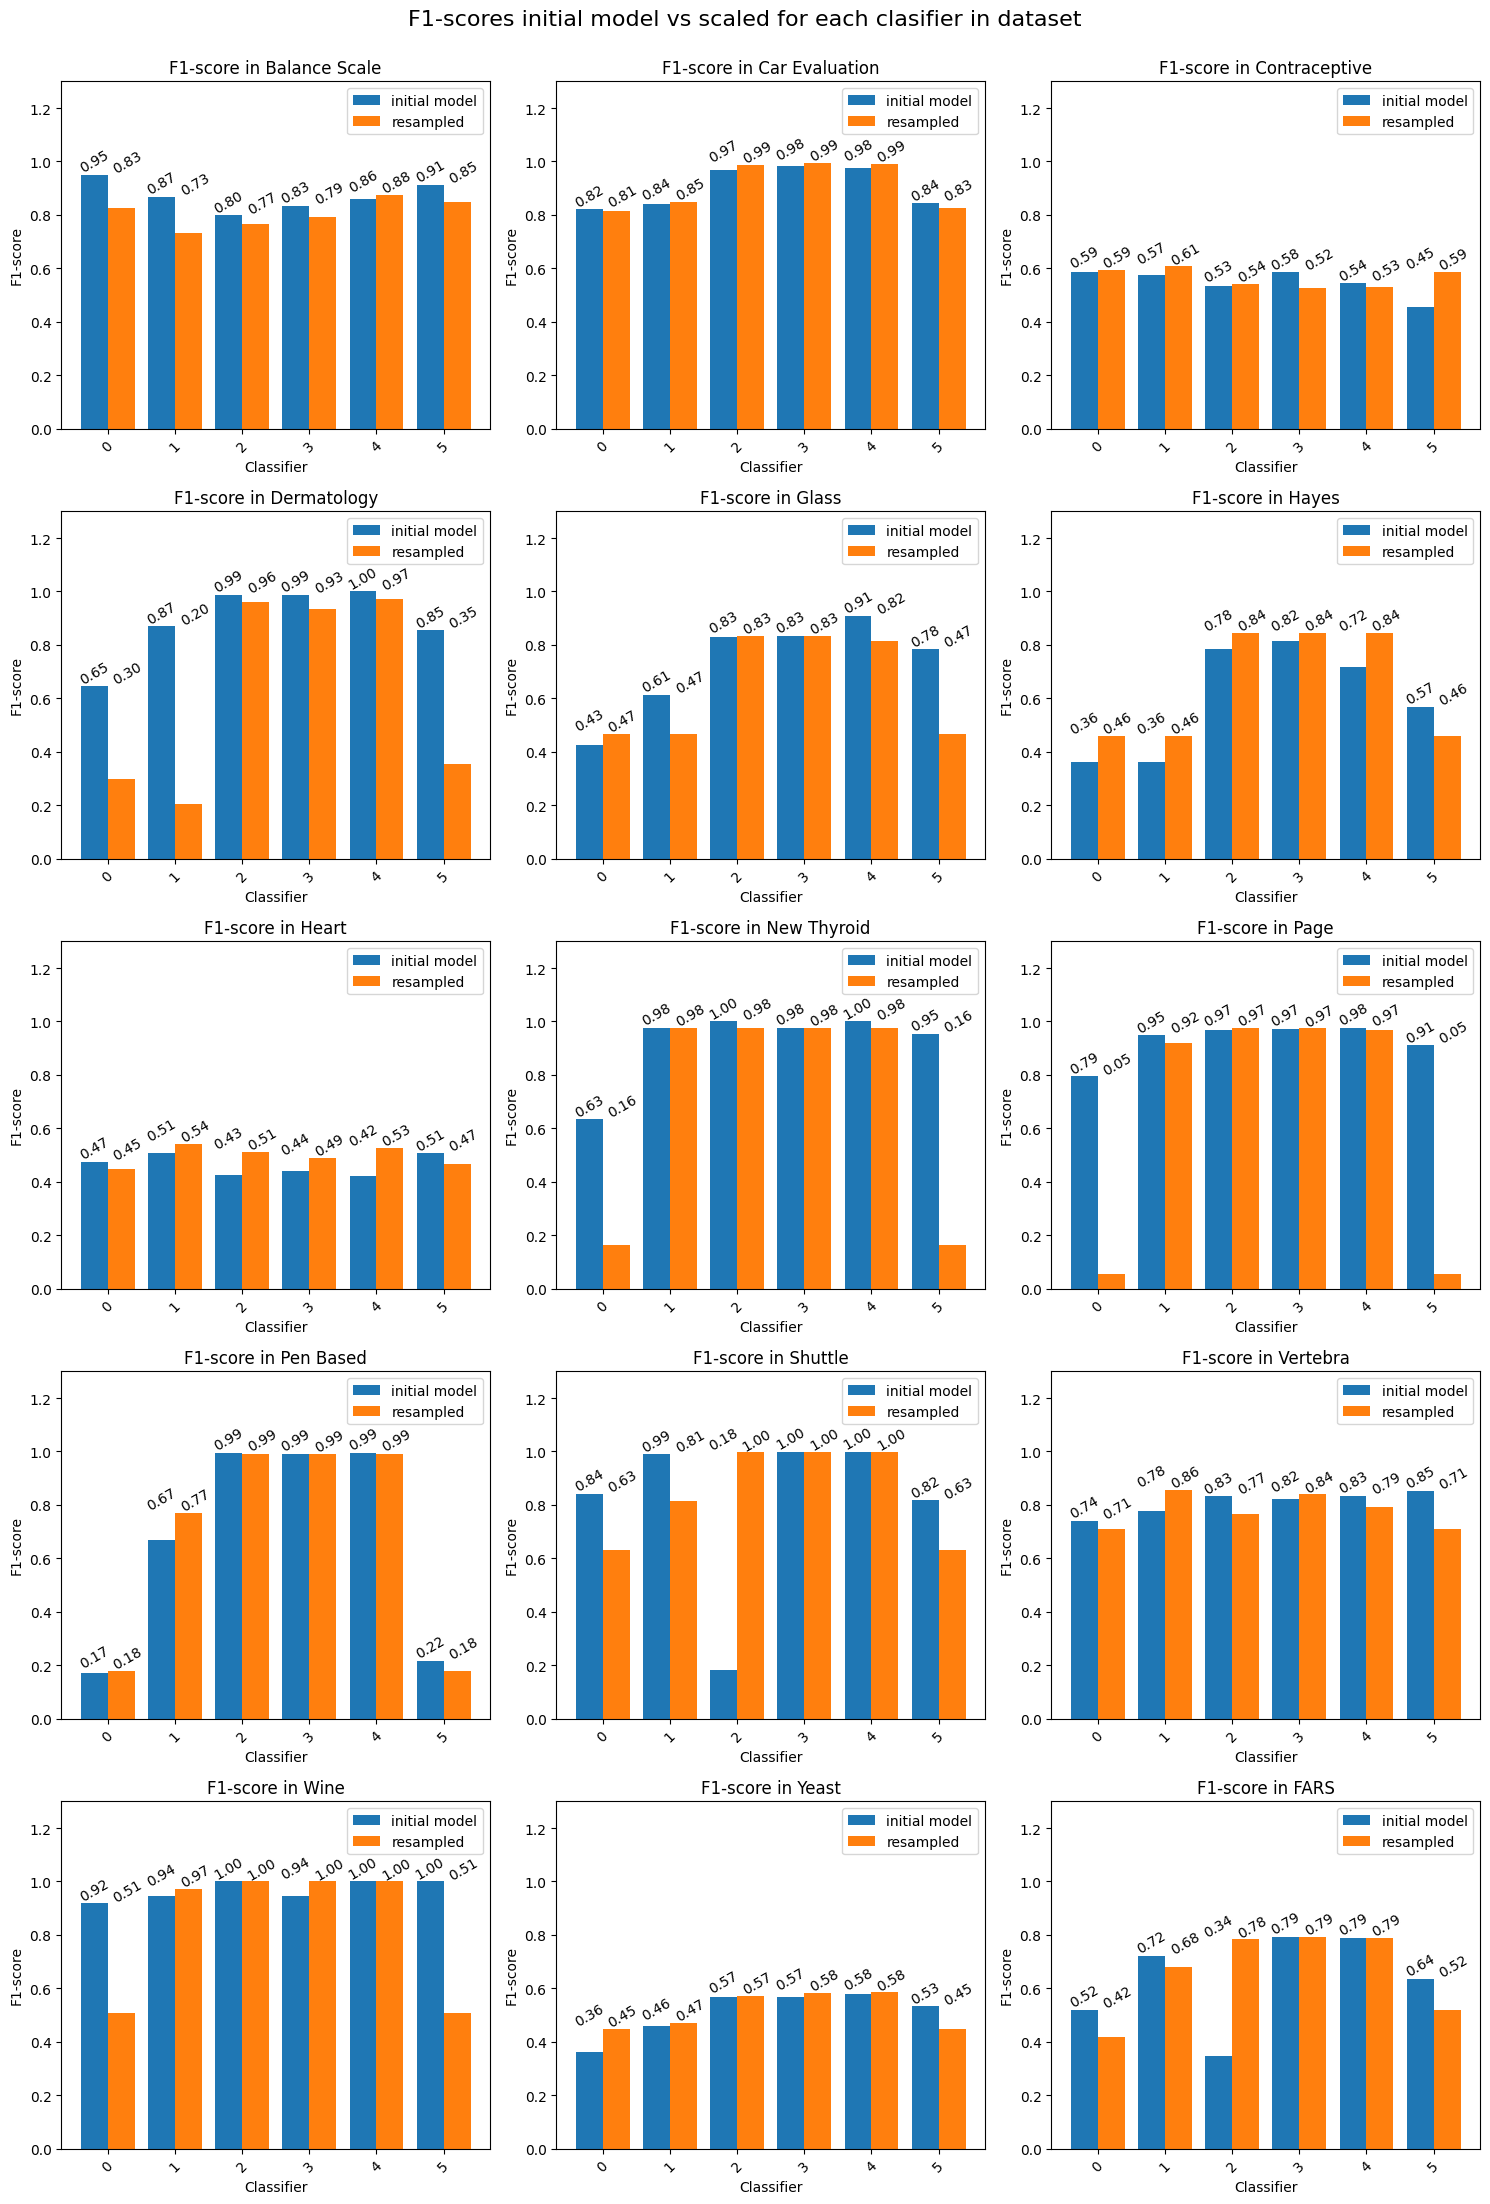

In [48]:
resampled_ros_results = {}
for file_name in files_list:
    result = pd.read_csv(f'result/resampled/RandomOverSampler_{file_name}', delimiter=',',index_col='Unnamed: 0')
    resampled_ros_results[f'{file_name[:-4]}'] = result
    
resampled_ros_results_datasetbase = {}
name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]
for i , name in enumerate(name_list):
    resampled_ros_results_datasetbase[name] = [result['f1'][i] for clf, result in resampled_ros_results.items()] 

fig, axs = plt.subplots(5, 3, figsize=(15, 22))
for i, (dataset, scores) in enumerate(initial_model_results_datasetbase.items()):
    row = i // 3
    col = i % 3
    clf_names = ['AdaBoost','AdaBoost_SAMME','GradientBoosting','XGBoost','CatBoost','RUSBoostClassifier']
    clf_in_score = scores

    clf_re_score = resampled_ros_results_datasetbase[dataset]
    
    x = np.arange(len(clf_names))  
    width = 0.4  

    rects1 = axs[row, col].bar(x - width/2, clf_in_score, width, label='initial model')
    rects2 = axs[row, col].bar(x + width/2, clf_re_score, width, label='resampled')
    
    axs[row, col].set_xlabel('Classifier')
    axs[row, col].set_ylabel('F1-score')
    axs[row, col].set_title(f'F1-score in {dataset}')
    axs[row, col].set_ylim(0, 1.3)  
    axs[row, col].legend()
    for tick in axs[row, col].get_xticklabels():
        tick.set_rotation(45)

    for bar, value1, value2 in zip(rects1, clf_in_score, clf_re_score):
        height = max(value1, value2)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(value1),
                           ha='center', va='bottom', color='black', fontsize=10, rotation=30)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2 + 0.5, height + 0.1, '{:.2f}'.format(value2),
                           ha='center', va='top', color='black', fontsize=10, rotation=30)

        

fig.suptitle('F1-scores initial model vs scaled for each clasifier in dataset', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

**SMOTE**

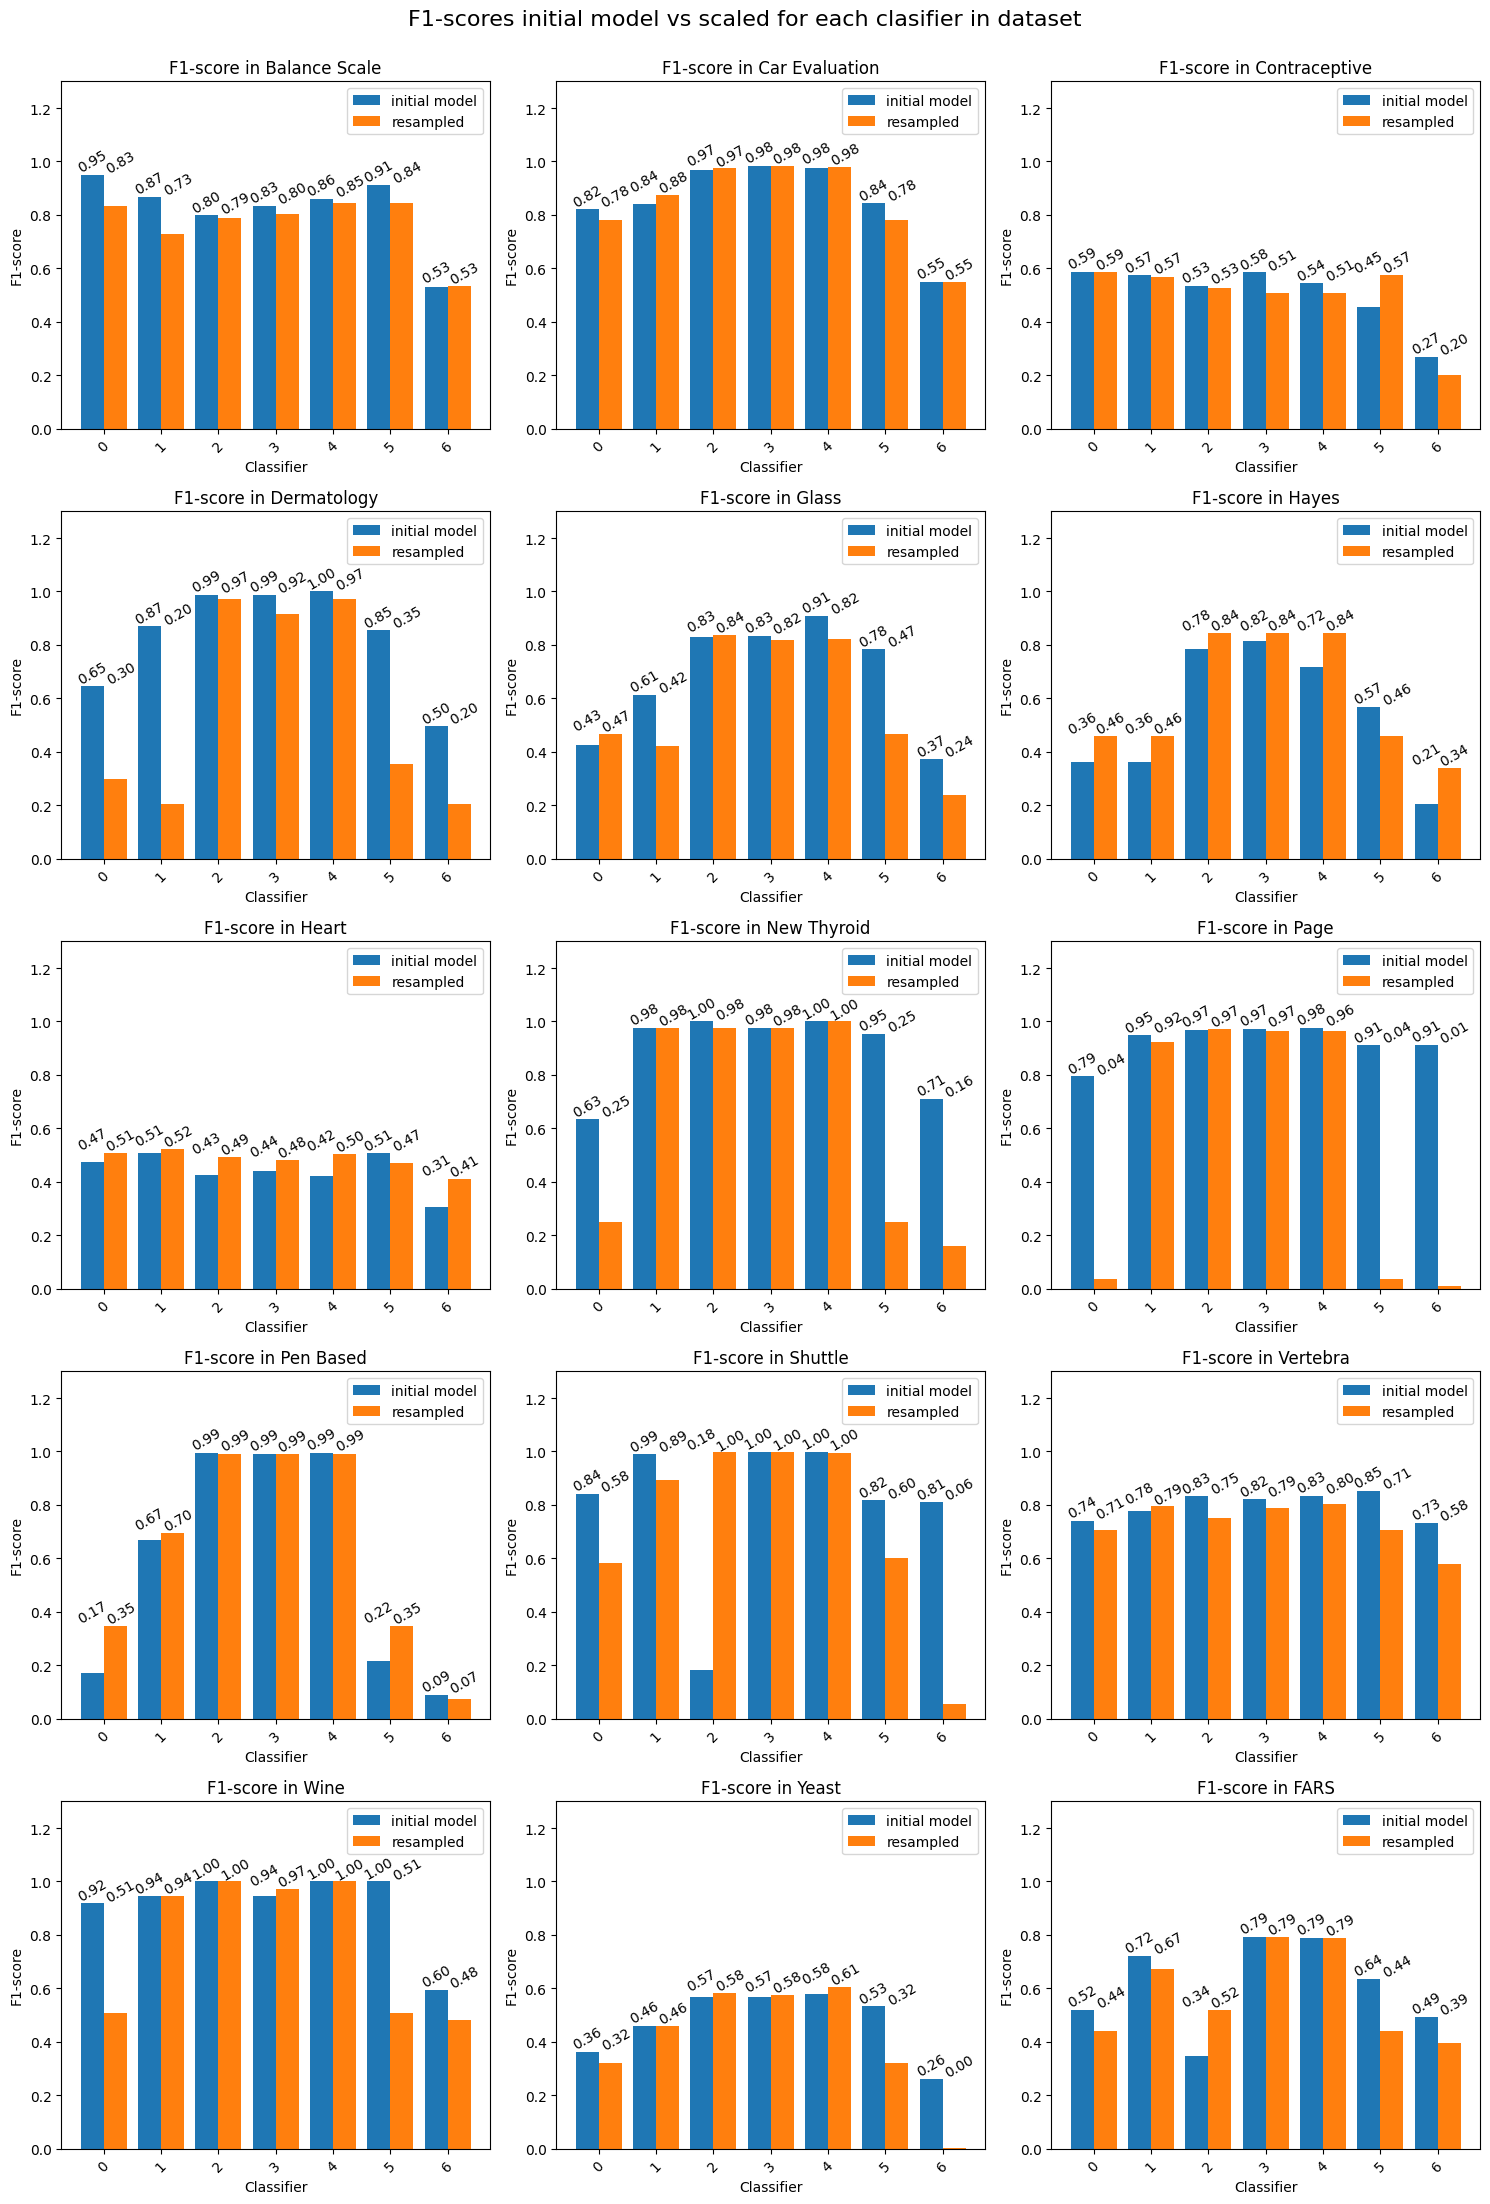

In [19]:
resampled_sm_results = {}
for file_name in files_list:
    result = pd.read_csv(f'result/resampled/SMOTE_{file_name}', delimiter=',',index_col='Unnamed: 0')
    resampled_sm_results[f'{file_name[:-4]}'] = result
    
resampled_sm_results_datasetbase = {}
name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]
for i , name in enumerate(name_list):
    resampled_sm_results_datasetbase[name] = [result['f1'][i] for clf, result in resampled_sm_results.items()] 

fig, axs = plt.subplots(5, 3, figsize=(15, 22))
for i, (dataset, scores) in enumerate(initial_model_results_datasetbase.items()):
    row = i // 3
    col = i % 3
    clf_names = ['AdaBoost','AdaBoost_SAMME','GradientBoosting','XGBoost','CatBoost','RUSBoostClassifier','AdaCost']
    clf_in_score = scores

    clf_re_score = resampled_sm_results_datasetbase[dataset]
    
    x = np.arange(len(clf_names))  
    width = 0.4  

    rects1 = axs[row, col].bar(x - width/2, clf_in_score, width, label='initial model')
    rects2 = axs[row, col].bar(x + width/2, clf_re_score, width, label='resampled')
    
    axs[row, col].set_xlabel('Classifier')
    axs[row, col].set_ylabel('F1-score')
    axs[row, col].set_title(f'F1-score in {dataset}')
    axs[row, col].set_ylim(0, 1.3)  
    axs[row, col].legend()
    for tick in axs[row, col].get_xticklabels():
        tick.set_rotation(45)

    for bar, value1, value2 in zip(rects1, clf_in_score, clf_re_score):
        height = max(value1, value2)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(value1),
                           ha='center', va='bottom', color='black', fontsize=10, rotation=30)
        axs[row, col].text(bar.get_x() + bar.get_width() / 2 + 0.5, height + 0.1, '{:.2f}'.format(value2),
                           ha='center', va='top', color='black', fontsize=10, rotation=30)

        

fig.suptitle('F1-scores initial model vs scaled for each clasifier in dataset', fontsize=16, y=1)  
plt.tight_layout()
plt.show()

# Base learner changed

In [50]:
changed_base_learner_results = {}
for file_name in files_list:
    if file_name in ['AdaBoost.csv', 'AdaBoost_SAMME.csv','RUSBoostClassifier.csv']:
        result = pd.read_csv(f'result/baselearner/{file_name}', delimiter=',',index_col='Unnamed: 0')
        changed_base_learner_results[file_name[:-4]] = result

In [51]:
changed_base_learner_results_DT_datasetbase = {}
name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]
for i , name in enumerate(name_list):
    changed_base_learner_results_DT_datasetbase[name] = [result['f1'][i*3] for clf, result in changed_base_learner_results.items()] 


In [52]:
changed_base_learner_results_LR_datasetbase = {}
name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]
for i , name in enumerate(name_list):
    changed_base_learner_results_LR_datasetbase[name] = [result['f1'][i*3+1] for clf, result in changed_base_learner_results.items()] 


In [53]:
changed_base_learner_results_GNB_datasetbase = {}
name_list = [
    'Balance Scale', 'Car Evaluation', 'Contraceptive',
    'Dermatology', 'Glass', 'Hayes', 'Heart',
    'New Thyroid', 'Page', 'Pen Based', 'Shuttle',
    'Vertebra', 'Wine', 'Yeast', 'FARS'
]
for i , name in enumerate(name_list):
    changed_base_learner_results_GNB_datasetbase[name] = [result['f1'][i*3+2] for clf, result in changed_base_learner_results.items()] 


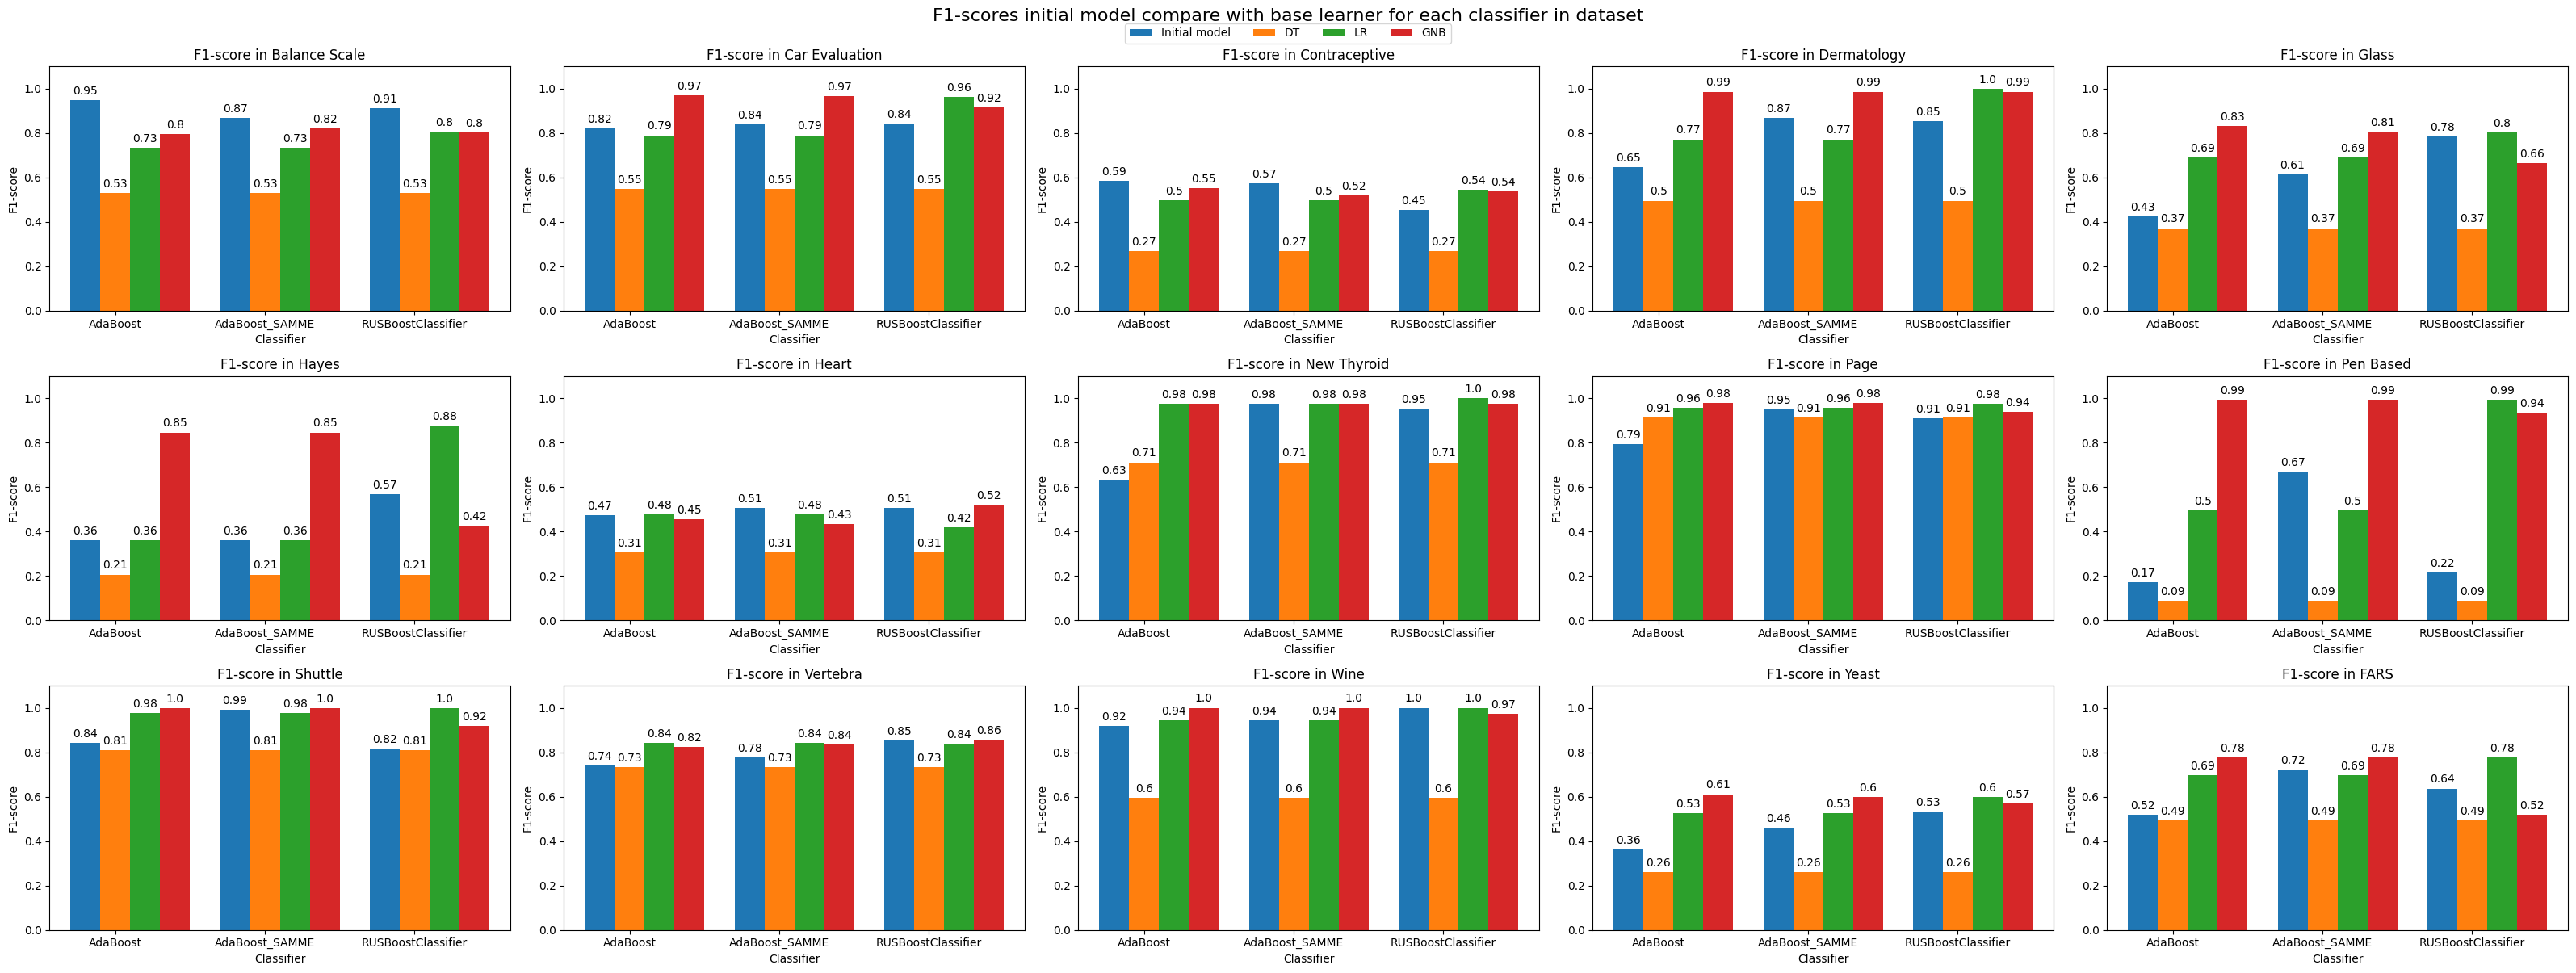

In [54]:
fig, axs = plt.subplots(3, 5, figsize=(32, 12))
bar_width = 0.2
for i, (dataset, scores) in enumerate(initial_model_results_datasetbase.items()):
    row = i // 5
    col = i % 5
    clf_names = ['AdaBoost', 'AdaBoost_SAMME', 'RUSBoostClassifier']
    clf_in_score = [scores[0], scores[1], scores[5]]  # score for AdaBoost,AdaBoost_SAMME,RUSBoostClassifier

    clf_re_DT_score = changed_base_learner_results_DT_datasetbase[dataset]
    clf_re_LR_score = changed_base_learner_results_LR_datasetbase[dataset]
    clf_re_BNB_score = changed_base_learner_results_GNB_datasetbase[dataset]

    x = np.arange(len(clf_names))

    rects1 = axs[row, col].bar(x - bar_width, clf_in_score, bar_width, label='Initial model')
    rects2 = axs[row, col].bar(x, clf_re_DT_score, bar_width, label='DT')
    rects3 = axs[row, col].bar(x + bar_width, clf_re_LR_score, bar_width, label='LR')
    rects4 = axs[row, col].bar(x + 2 * bar_width, clf_re_BNB_score, bar_width, label='GNB')

    axs[row, col].set_xlabel('Classifier')
    axs[row, col].set_ylabel('F1-score')
    axs[row, col].set_title(f'F1-score in {dataset}')
    axs[row, col].set_ylim(0, 1.1)
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(clf_names, rotation=0)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            axs[row, col].annotate('{}'.format(round(height, 2)),
                                   xy=(rect.get_x() + rect.get_width() / 2, height),
                                   xytext=(0, 3),  # 3 points vertical offset
                                   textcoords="offset points",
                                   ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

fig.suptitle('F1-scores initial model compare with base learner for each classifier in dataset', fontsize=16, y=1)
plt.tight_layout()

# Adjusting the legend position
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4)

plt.show()


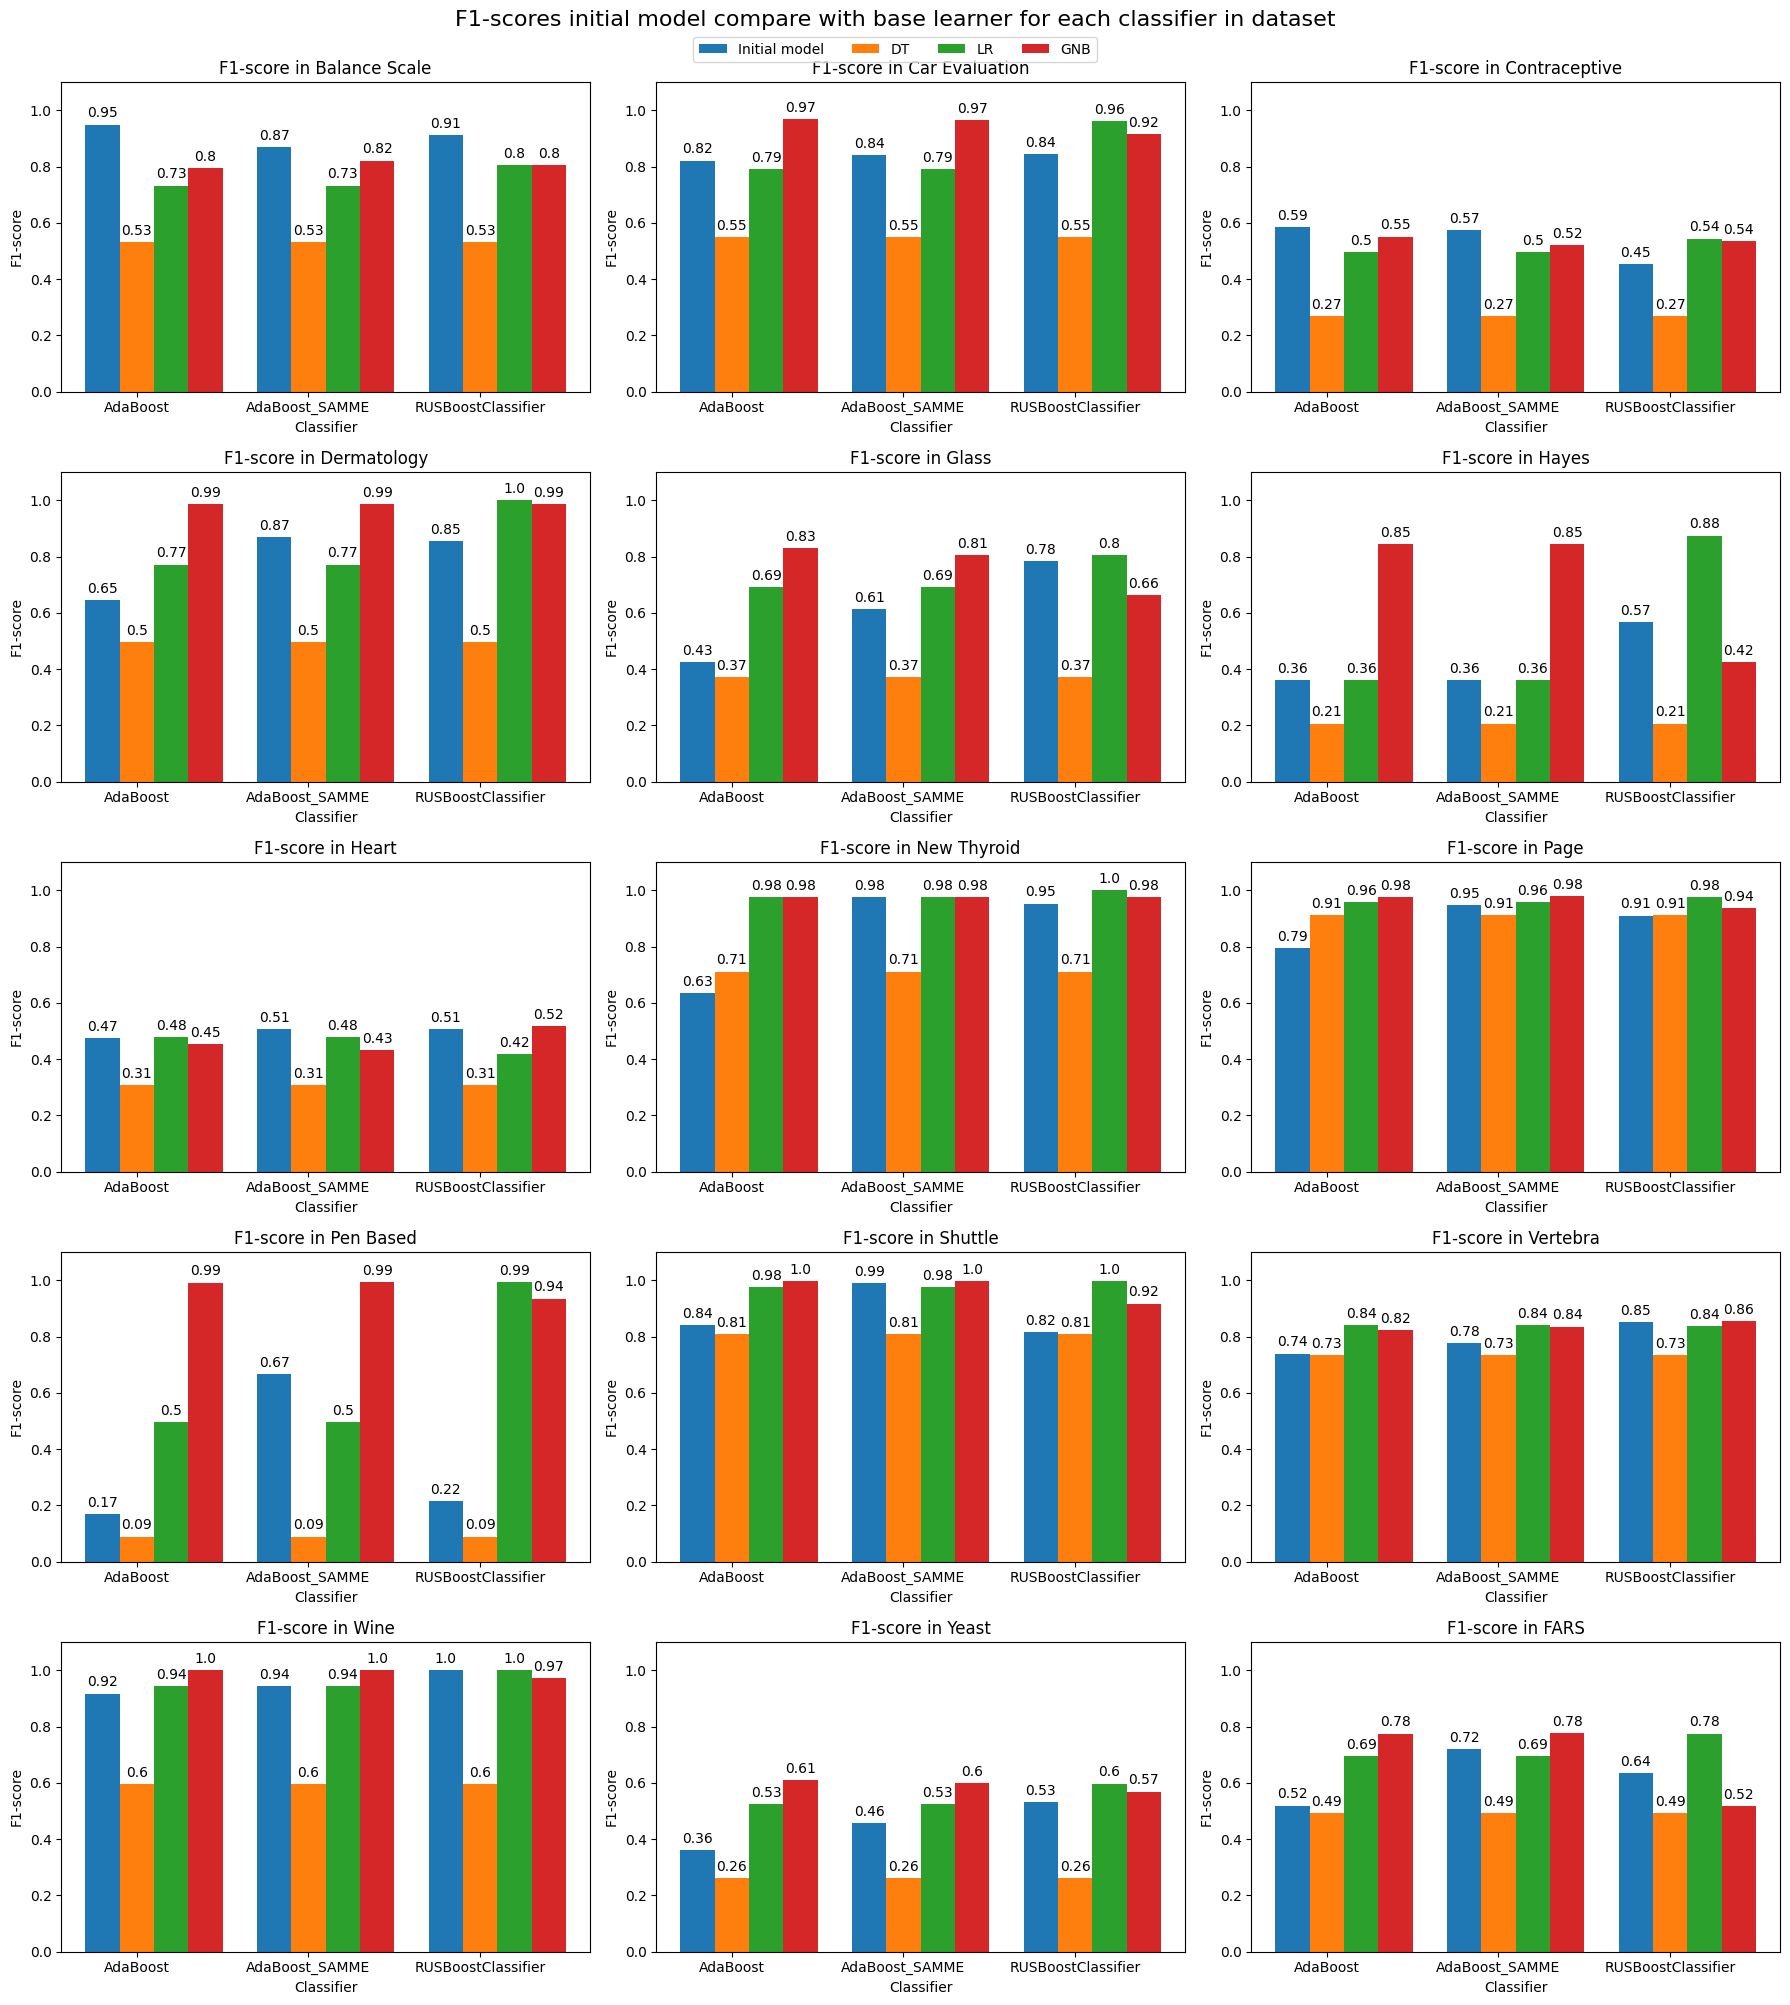

In [55]:
#same plot diff layout
fig, axs = plt.subplots(5, 3, figsize=(18, 20))
bar_width = 0.2
for i, (dataset, scores) in enumerate(initial_model_results_datasetbase.items()):
    row = i // 3
    col = i % 3
    clf_names = ['AdaBoost', 'AdaBoost_SAMME', 'RUSBoostClassifier']
    clf_in_score = [scores[0], scores[1], scores[5]]  # score for AdaBoost,AdaBoost_SAMME,RUSBoostClassifier

    clf_re_DT_score = changed_base_learner_results_DT_datasetbase[dataset]
    clf_re_LR_score = changed_base_learner_results_LR_datasetbase[dataset]
    clf_re_BNB_score = changed_base_learner_results_GNB_datasetbase[dataset]

    x = np.arange(len(clf_names))

    rects1 = axs[row, col].bar(x - bar_width, clf_in_score, bar_width, label='Initial model')
    rects2 = axs[row, col].bar(x, clf_re_DT_score, bar_width, label='DT')
    rects3 = axs[row, col].bar(x + bar_width, clf_re_LR_score, bar_width, label='LR')
    rects4 = axs[row, col].bar(x + 2 * bar_width, clf_re_BNB_score, bar_width, label='GNB')

    axs[row, col].set_xlabel('Classifier')
    axs[row, col].set_ylabel('F1-score')
    axs[row, col].set_title(f'F1-score in {dataset}')
    axs[row, col].set_ylim(0, 1.1)
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(clf_names, rotation=0)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            axs[row, col].annotate('{}'.format(round(height, 2)),
                                   xy=(rect.get_x() + rect.get_width() / 2, height),
                                   xytext=(0, 3),  # 3 points vertical offset
                                   textcoords="offset points",
                                   ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)

fig.suptitle('F1-scores initial model compare with base learner for each classifier in dataset', fontsize=16, y=1)
plt.tight_layout()

# Adjusting the legend position
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.99), ncol=4)

plt.show()
